# News Category Classifier

## 1.0 Introduction

Assuming we have small or large text and we want to know which category the text belongs, how can we predict what the subject of the text is?  
This question is related to the problem of classification, a classification problem is when the output variable is a category, In our scenario the output variable it's like "politics, "food", "science" etc.

In this project we present a model that deals with the classification problem.
To solve the text classification problem we set a goal to our research: to see if we can build a model that will classify the subject of the text according to the frequency of words in each category. 

In our research we focus on 7 categories:

* Technology  
* Politics
* Sports
* Entertainment
* Weather
* Science
* Business
* Food


## Table of Contents

1. [Introduction](#10-introduction)  
2. [Requirements and Imports](#20-requirements-and-imports)  
2.1 [Requirements](#21-requirements)  
2.2 [Imports](#22-imports)  
3. [Data Acquision](#30-data-acquision)  
3.1. [Resources](#31-resources)  
&nbsp;&nbsp;&nbsp;&nbsp;3.1.1 [Medium](#311-medium)  
&nbsp;&nbsp;&nbsp;&nbsp;3.1.2 [Hubpages](#312-hubpages)  
&nbsp;&nbsp;&nbsp;&nbsp;3.1.3 [Newsbreak](#313-newsbreak)  
&nbsp;&nbsp;&nbsp;&nbsp;3.1.4 [Weather.com](#314-weathercom)  
&nbsp;&nbsp;&nbsp;&nbsp;3.1.5 [Siencenews](#315-sciencenews)  
&nbsp;&nbsp;&nbsp;&nbsp;3.1.6 [Food52](#316-food52)  
3.2 [Data Acquision Results](#32-data-acquision-results)  
4. [Data Cleaning](#40-data-cleaning)  
4.1 [Remove Unnecessary Columns](#41-remove-unnecessary-columns)  
4.2 [Remove Null Objects](#42-remove-null-objects)  
4.3 [Remove Duplicate Rows](#43-remove-duplicate-rows)  
5. [EDA](#50-eda)  
5.1 [Merged header and content](#51-merged-header-and-content)  
5.2 [Visualization Vol.1](#52-visualization-vol1)  
&nbsp;&nbsp;&nbsp;&nbsp;5.2.1 [Pie Chart](#521-pie-chart)  
&nbsp;&nbsp;&nbsp;&nbsp;5.2.2 [WordCloud](#522-wordcloud)  
&nbsp;&nbsp;&nbsp;&nbsp;5.2.3 [Top 10 words](#523-top-10-words)  
&nbsp;&nbsp;&nbsp;&nbsp;5.2.4 [Distribution of Words](#524-distribution-of-words)  
&nbsp;&nbsp;&nbsp;&nbsp;5.2.5 [Conclustion](#525-conclustion)  
5.3 [Remove Text with Short Content](#53-remove-text-with-short-content)  
5.4 [Banford's Law](#54-banfords-law)  
5.5 [Remove Numbers \n and \r from Text](#55-remove-numbers-n-and-r-from-text)  
5.6 [Remove non-english Texts](#56-remove-non-english-texts)  
5.7 [Remove Special Characters](#57-remove-special-characters)  
5.8 [Lemmatization and POS](#58-lemmatization-and-pos)  
5.9 [Dataframe Lowercase](#59-dataframe-lowercase)  
5.10 [Remove Stopwords](#510-remove-stopwords)  
5.11 [Visualization Vol.2](#511-visualization-vol2)  
&nbsp;&nbsp;&nbsp;&nbsp;5.11.1 [Pie Chart](#5111-pie-chart)  
&nbsp;&nbsp;&nbsp;&nbsp;5.11.2 [WordCloud](#5112-wordcloud)  
&nbsp;&nbsp;&nbsp;&nbsp;5.11.3 [Top 10 Words](#5113-top-10-words)  
&nbsp;&nbsp;&nbsp;&nbsp;5.11.4 [Distribution of Words](#5114-distribution-of-words)  
5.12 [Final EDA Conclustion](#512-final-eda-conclustion)  
6. [Vectorization and Machine Learning](#60-vectorization-and-machine-learning)  
6.1 [Vectorization](#61-vectorization)  
6.2 [Multinomial NB](#62-multinomial-nb)  
&nbsp;&nbsp;&nbsp;&nbsp;6.2.1 [Confusion Matrix](#621-confusion-matrix)  
&nbsp;&nbsp;&nbsp;&nbsp;6.2.2 [Cross Validation](#622-cross-validation)  
6.3 [SVM Classifier](#63-svm-classifier)  
&nbsp;&nbsp;&nbsp;&nbsp;6.3.1 [Confusion Matrix](#631-confusion-matrix)  
&nbsp;&nbsp;&nbsp;&nbsp;6.3.2 [Cross Validation](#632-cross-validation)  
7.0 [Project Conclustion](#70-project-conclustion)    


# 2.0 Requirements and Imports

## 2.1 Requirements

In our project we use these python packages:

```
pandas
numpy
matplotlib
beatifulsoup
nltk
sklearn
seaborn
selenium
langdetect
wordcloud
yellowbrick

```

**selenium** - The selenium package is used to automate web browser interaction from Python. For more details click [here](https://pypi.org/project/selenium/).  

**langdetect** - Google's language-detection library. For more details click [here](https://pypi.org/project/langdetect/).  

**wordcloud** - Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. For more details click [here](https://pypi.org/project/wordcloud/).  

## 2.2 Imports

In [1]:
import os
import re
import bs4
import time
import requests
import pandas as pd
import numpy as np
from os import listdir
from datetime import date
from bs4 import BeautifulSoup  
from os.path import isfile, join

# --- selenium libraries
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service

# language detector
from langdetect import detect
from langdetect import detect_langs

# Wordcloud visualization
import seaborn as sns
import itertools
import collections
from PIL import Image
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

# nltk
import nltk
import nltk.corpus
from nltk import word_tokenize
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, Tree
nltk.download("stopwords")
nltk.download('averaged_perceptron_tagger')

# sklearn
from sklearn import svm
from sklearn import metrics
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import fetch_20newsgroups
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score,StratifiedKFold

# Handle warnings
import warnings
warnings.filterwarnings('ignore')

# YellowBrick
from yellowbrick.classifier import ClassPredictionError


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sergeyjuchenko/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/sergeyjuchenko/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# 3.0 Data Acquision

Data acquisition meaning is to collect data from relevant sources before it can be cleaned, preprocessed, and used for further mechanisms.  
In this part of the project we will acquire articles from different sites for train our model.  

## 3.1 Resources


This is all our resources sites:
    
* [medium]("https://medium.com/")
* [hubpages]("https://discover.hubpages.com/")
* [newsbreak]("https://www.newsbreak.com/channels/sports")
* [sceinceNews]("https://www.sciencenews.org/")
* [weather.com]("https://weather.com")
* [food52]("https://food52.com/")


### 3.1.1 Medium


`Medium` is a social publishing platform that is open to all and home to a diverse array of stories, ideas, and perspectives. Anyone can be an individual contributor, and popular topics on Medium range from mental health to social media, and from world affairs and trending news to productivity hacks. 

From medium site we extract these categories:

* Technology
* Politics
* Sports
* Entertainment
* Weather
* Science
* Business
* Food

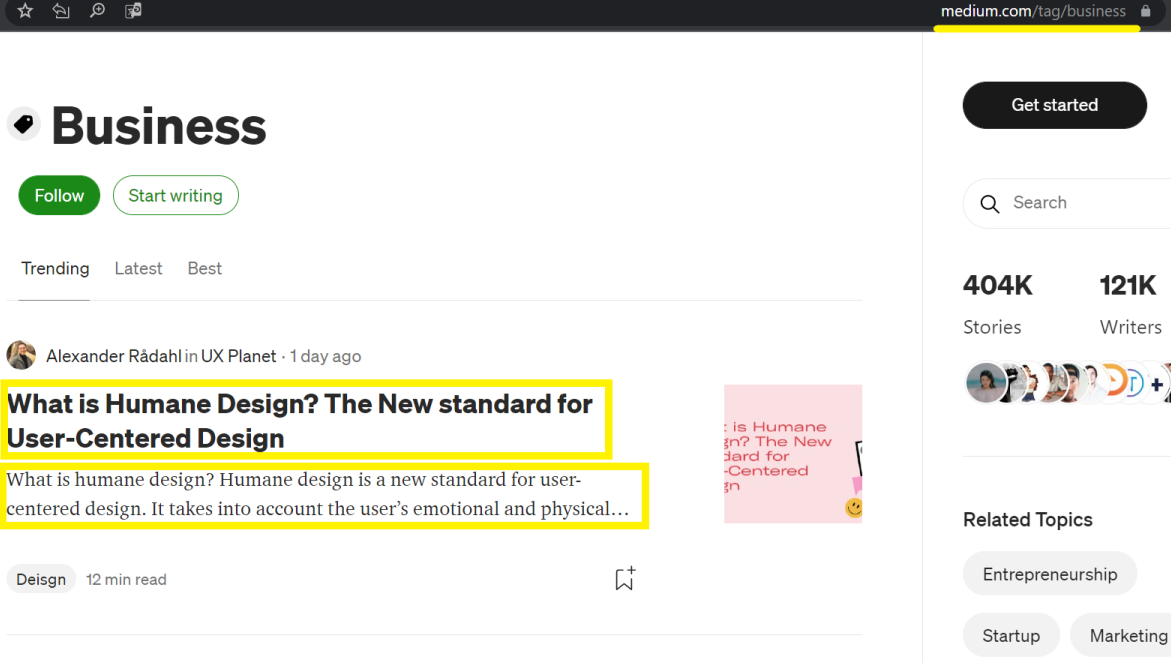

**The difficulties from this site:**

The difficulties in `Medium` were that in order to load more articles on the site, the program should scroll down in order to load new articles. 


In [2]:
#chromedriver.exe for windows users!

In [3]:
def get_infinity_page_html_data(chromedriver_path="./chromedriver.exe", scroll_number=1, sleep_time=3):
    # Create selenium driver
    s = Service(chromedriver_path)
    driver = webdriver.Chrome(service=s)    
    driver.get(url)
    
    for i in range(1,scroll_number):
        print(f"scroll_number: {i}")
        driver.execute_script("window.scrollTo(1,50000)")
        time.sleep(sleep_time)
    html_data = driver.page_source
    driver.close()
    
    return html_data

In [4]:
def extract_medium_articles_from_HTML_data(html_data):
    # Extract articles from HTML data 
    soup = BeautifulSoup(html_data, 'html.parser')    
    articles = soup.find_all("article")
    print(f"Number of articles: {len(articles)}")
    
    return articles

In [5]:
def create_df_from_articles(articles,category):    
    # Create a lists for df
    categories = []
    headers = []
    contents = []
    for article in articles:
        headers.append(article.find("h2").get_text()) 
        categories.append(category)
        
        if category == "politics" or category == "food":
            content = article.find("p", {"class": lambda L: L and L.startswith('lj b do dp')})        
        if category == "sports" or category == "technology" or category == "weather":
            content = article.find("p", {"class": lambda L: L and L.startswith('lf b do dp')})
        if category == "entertainment":
            content = article.find("p", {"class": lambda L: L and L.startswith('lg b do dp')})
        if category == "business" or category == "science":
            content = article.find("p", {"class": lambda L: L and L.startswith('li b do dp')})
        
        if content is not None:
            contents.append(content.get_text())
        else:
            contents.append(content)        
        
    return pd.DataFrame(
        {"category": categories,  
         "header": headers,
         "content": contents})

In [ ]:
categories = ["technology", "politics", "sports", "entertainment", "weather", "science", "business", "food"]

for category in categories:     
    url = f"https://medium.com/tag/{category}"
    html_data = get_infinity_page_html_data(scroll_number=10)
    articles = extract_medium_articles_from_HTML_data(html_data)
    df = create_df_from_articles(articles, category)
    print(df.shape)
    
    df.to_csv(f"./csv_files/medium_{category}_{date.today()}.csv") 

### 3.1.2 Hubpages

`HubPages` is an American online publishing platform was launched in 2006. Members post informational articles and earn a share of the income from those articles through the HubPages Earnings Program.


From medium site we extract these categories:

* Technology
* Politics
* Sports
* Entertainment
* Business
* Food

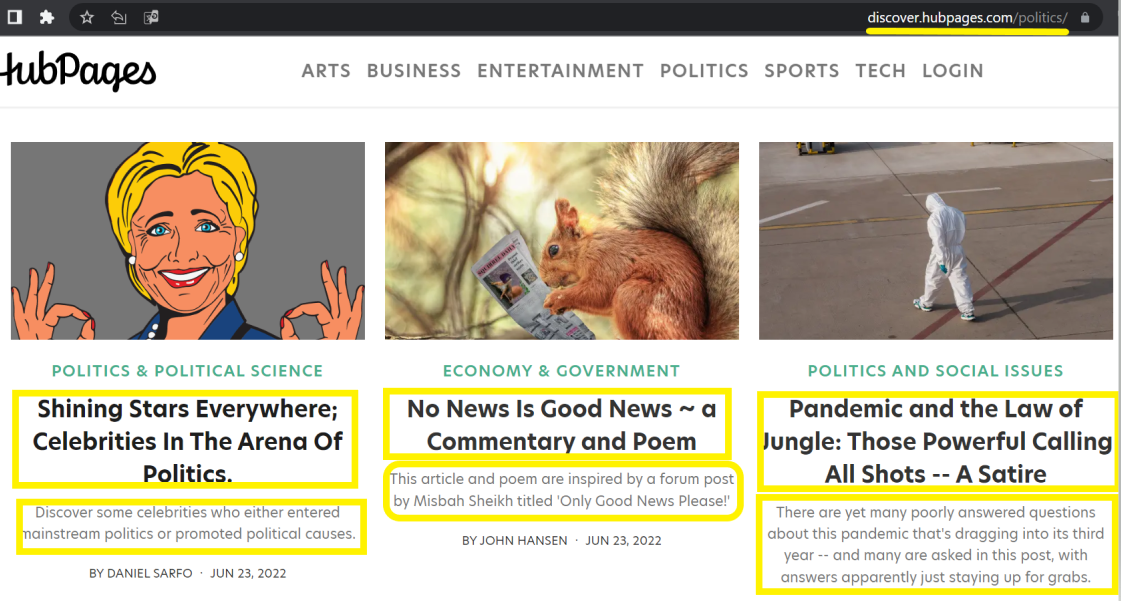

**The difficulties from this site:**  
The difficulties in `Hubpages` are that in order to load more articles on the site, the program shuold tap the “show more” button  at the bottom of the webpage.

In [6]:
def get_page_html_data_with_see_more_option(url, chromedriver_path="./chromedriver.exe", numbers_of_see_more_clicks=1, sleep_time=3):
    # Create selenium driver
    service = Service(chromedriver_path)
    driver = webdriver.Chrome(service=service)    
    driver.get(url)
    driver.maximize_window()

    for i in range(1,numbers_of_see_more_clicks+1):                
        button_xpath = "//button[@class='m-footer-loader--button m-component-footer--loader m-button']"                
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(sleep_time)
        print(f"Numbers of clicks: {i}")
        driver.find_element(by=By.XPATH, value=button_xpath).click()                    
        time.sleep(sleep_time)
        
    html_data = driver.page_source
    driver.close()
    
    return html_data

In [7]:
def extract_hubpages_articles_from_HTML_data(html_data):        
    # Extract articles from HTML data 
    soup = BeautifulSoup(html_data, 'html.parser')    
    articles = soup.find_all("div", {"class": "m-card--content"})          
    
    return articles

In [8]:
def create_df_from_articles(articles, category):    
    # Create a lists for df
    categories = []
    headers = []
    contents= []

    for article in articles:
        categories.append(category)
        headers.append(article.find("h2").get_text())
        content = article.find("p", {"class": "m-card--body m-ellipsis--text"})
        if content is not None:
            contents.append(content.get_text())            
        else:
            contents.append(content)                
        
    return pd.DataFrame(
        {"category": categories,  
         "header": headers, 
         "contents": contents})

In [ ]:
#"science", "weather" - doesnt exists
categories = ["politics", "sports", "food", "entertainment", "business", "technology"]
categories = ["entertainment", "business", "technology"]
for category in categories: 
    url = f"https://discover.hubpages.com/{category}/"
    html_data = get_page_html_data_with_see_more_option(url, numbers_of_see_more_clicks=10)
    articles = extract_hubpages_articles_from_HTML_data(html_data)
    df = create_df_from_articles(articles, category)    
    df.to_csv(f"./csv_files/hubpages_{category}_{date.today()}.csv")
    print(df.shape)    

### 3.1.3 Newsbreak

`Newsbreak` is an online news and current affairs magazine published in the Philippines. It began as a weekly print magazine that was published from January 24, 2001, to 2006. The Newsbreak website, launched in 2006, now functions as the investigative and research arm of online news organization Rappler.

From medium site we extract these categories:

* Technology
* Politics
* Sports
* Entertainment
* Weather
* Science
* Business

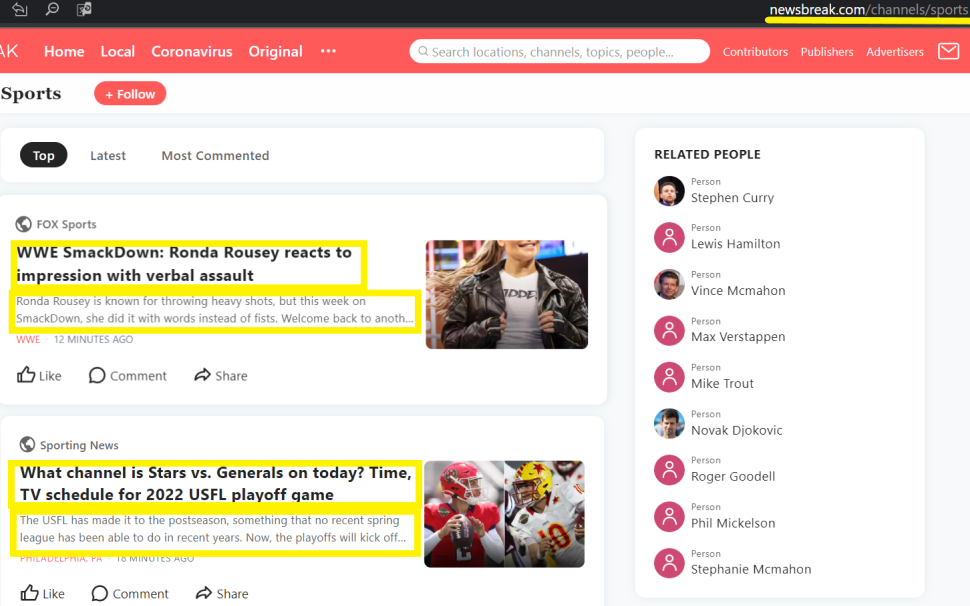


**The difficulties from this site:**  
The difficulties in `Newsbreak` were that in order to load more articles on the site, the program shuold scroll down in order to load new article.  

In [9]:
def get_infinity_page_html_data(chromedriver_path="./chromedriver.exe", scroll_number=1, sleep_time=3):
    # Create selenium driver
    service = Service(chromedriver_path)
    driver = webdriver.Chrome(service=service)    
    driver.get(url)
    
    for i in range(1,scroll_number+1):
        print(f"scroll_number: {i}")
        driver.execute_script("window.scrollTo(1,50000)")
        time.sleep(sleep_time)
    html_data = driver.page_source
    driver.close()
    
    return html_data

In [10]:
def extract_newsbreak_articles_from_HTML_data(html_data):
    # Extract articles from HTML data 
    soup = BeautifulSoup(html_data, 'html.parser')    
    articles = soup.find_all("article")
    print(f"Number of articles: {len(articles)}")        
    
    return articles

In [11]:
def create_df_from_articles(articles,category):    
    # Create a lists for df
    categories = []
    headers = []
    contents= []
        
    for article in articles:            
        categories.append(category)        
        headers.append(article.find("a", {"class": lambda L: L and L.startswith('ContentCardBody_title')}).get_text())                           
        contents.append(article.find("div", {"class": lambda L: L and L.startswith('ContentCardBody_summary')}).get_text())    
    
    return pd.DataFrame(
        {"categories": categories,  
         "headers": headers, 
         "contents": contents})

In [ ]:
# "food" - doesnt exists
categories = ["technology","politics", "sports", "science", "entertainment", "business", 'weather']
for category in categories: 
    url = f"https://www.newsbreak.com/channels/{category}"    
    html_data = get_infinity_page_html_data(scroll_number=10)
    articles = extract_newsbreak_articles_from_HTML_data(html_data)
    df = create_df_from_articles(articles,category)
    df.to_csv(f"./csv_files/newsbreak_{category}_{date.today()}.csv")
    print(df.shape)
    print()

### 3.1.4 Weather.com

`The Weather Channel (TWC)` is an American pay television channel owned by Weather Group, LLC, a subsidiary of Allen Media Group. The Weather Channel was a subsidiary of the Weather Company until the latter was bought by IBM in 2016. The Weather Channel licenses its weather data from IBM.

From medium site we extract these categories:  
* Weather

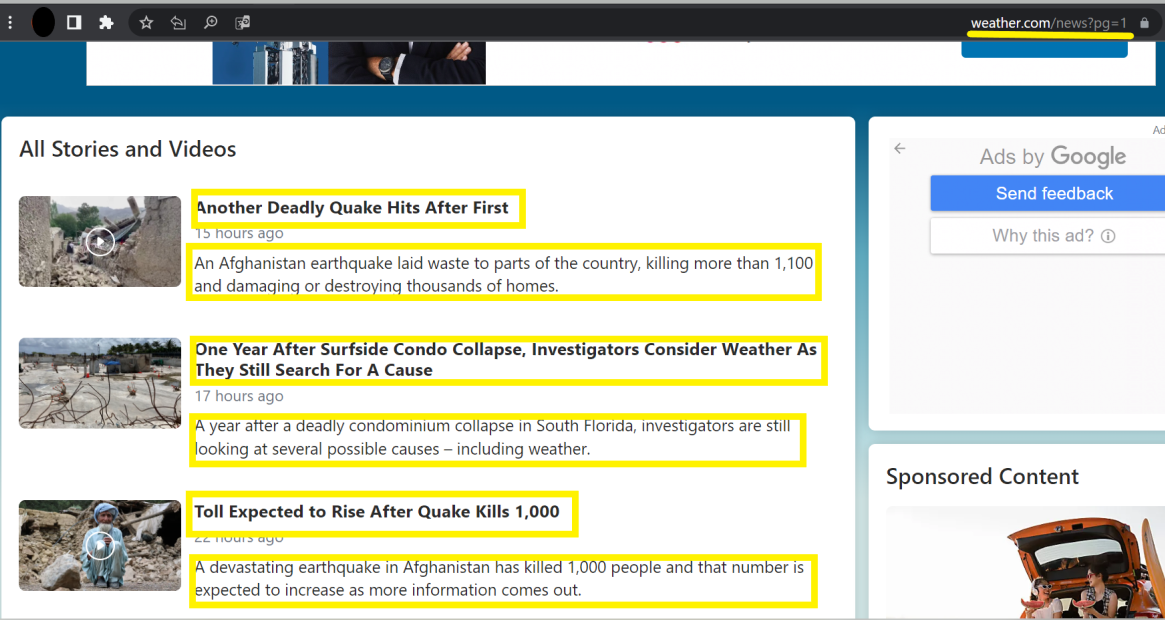

In [12]:
def extract_articles_HTML(url):
    request = requests.get(url)
    return BeautifulSoup(request.content, 'html.parser')
    

In [13]:
def create_weather_news_df(url,page):
    header = []
    content = []
    category = []
    for i in range(page,page+1):
        time.sleep(3)
        try:
            url = url+f"{i}"
            soup = extract_articles_HTML(url)


            main_content = soup.find("div",{"id":lambda L: L and L.startswith('WxuCollectionMediaList-main')})
            li_lst = main_content.find_all("li")
            print(f"page number: {i}")            
            for li in li_lst:
                header.append(li.find("div",
                                       {"class":lambda L: L and L.startswith('CollectionMediaList--title')}).get_text())
                content.append(li.find("div",
                                       {"class":lambda L: L and L.startswith('CollectionMediaList--caption')}).get_text())
                category.append("weather")
            
        except:
            print(f"error in page {i}")
    return pd.DataFrame({"category":category, "header":header, "content":content})


In [ ]:
df = create_weather_news_df('https://weather.com/news?pg=',1)
for i in range(2,201):
    df = df.append(create_weather_news_df('https://weather.com/news?pg=',i))
    time.sleep(4)
    print(df.shape)
df.to_csv(f"./csv_files/weather_com_{date.today()}.csv")

### 3.1.5 ScienceNews

`Science News (SN)`, abbreviated on its website as Sci News, is an American bi-weekly magazine devoted to short articles about new scientific and technical developments, typically gleaned from recent scientific and technical journal.

From medium site we extract these categories:  
* Science

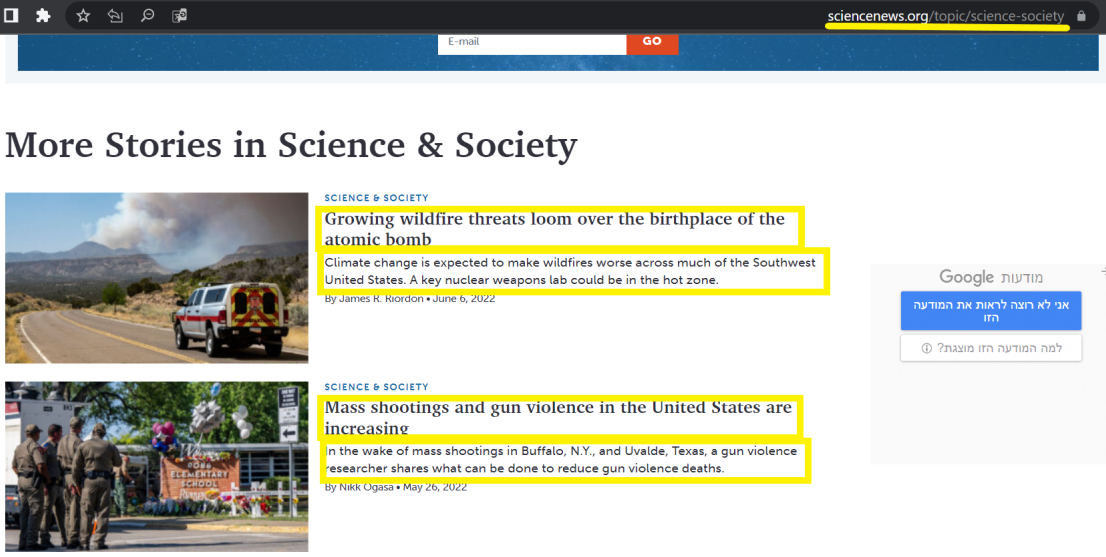


In [14]:
def create_science_news_df(url,page):
    header = []
    content = []
    category = []

    for i in range (page,page+1):
        time.sleep(3)
        try:
            print(f"page number: {i}")
            url = url + f'{i}'
            soup = extract_articles_HTML(url)

            main_content = soup.find_all("ol")[0]
            li_lst = main_content.find_all("li")

            for li in li_lst:
                category.append("science")
                header.append(li.find("h3").get_text().strip())
                content.append(li.find("p").get_text().strip())


        except:
            print(f"error in page {i}")


    return pd.DataFrame({"category":category, "header":header, "content":content})

In [ ]:
df = create_science_news_df('https://www.sciencenews.org/topic/science-society/page/',1)
for i in range(2,81):
    df = df.append(create_science_news_df('https://www.sciencenews.org/topic/science-society/page/',i))
    time.sleep(4)
    print(df.shape)

In [ ]:
df.to_csv(f"./csv_files/science_news_{date.today()}.csv")

### 3.1.5 Food52

On `Food52` you can find thousands of recipes submitted by it’s community and cooked by it’s editors in their own test kitchens.

From medium site we extract these categories:  
* Food

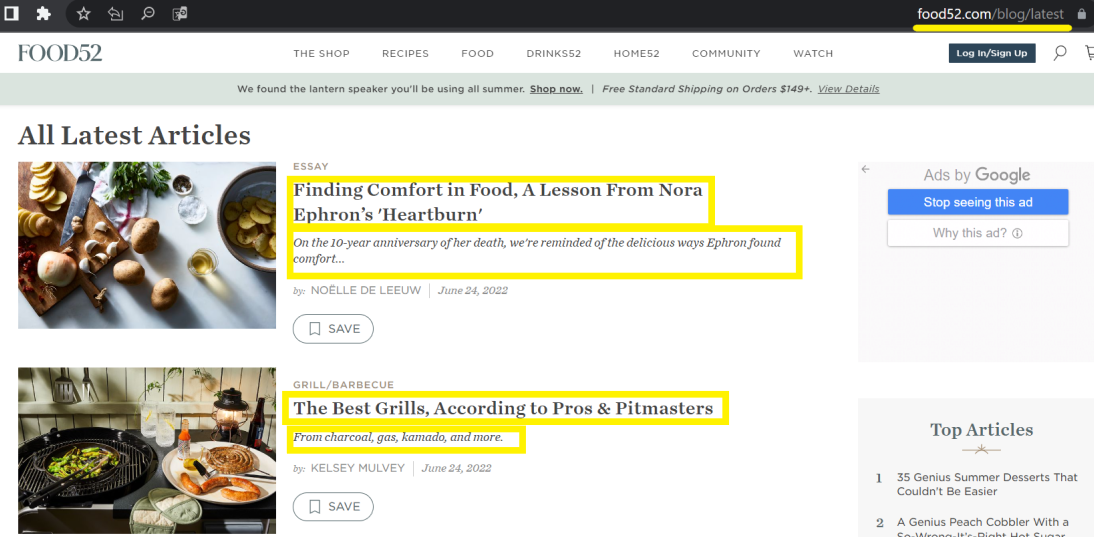

In [15]:
def create_food_news_df(url,page):
    header = []
    content = []
    category = []

    for i in range (page,page+1):
        time.sleep(3)
        try:
            print(f"page number: {i}")
            url = url + f'{i}'
            soup = extract_articles_HTML(url)

            content_lst = soup.find_all("div",{"class":"tag-post__body"})
            for item in content_lst:
                category.append("food")
                header.append(item.find("h3").get_text().strip())
                content.append(item.find("p").get_text().strip())

        except:
            print(f"error in page {i}")


    return pd.DataFrame({"category":category, "header":header, "content":content})

In [ ]:
df = create_food_news_df('https://food52.com/tags/food-news?page=',1)
for i in range(2,45):
    df = df.append(create_food_news_df('https://food52.com/tags/food-news?page=',i))
    time.sleep(4)
    print(df.shape)

In [ ]:
df.to_csv(f"./csv_files/food52_news_{date.today()}.csv")

## 3.2 Data Acquision Results


In the previous section we collect articles from several sites.  
For each site we create a `.csv` file.  
In this section we merged all `.csv` files into `merged_csv.csv` file.

In [16]:
#create a list of all file names
file_names_list = [f for f in listdir('./csv_files/') if isfile(join('./csv_files/', f))]

In [17]:
temp_df = pd.read_csv(f'./csv_files/{file_names_list[0]}')
temp_df.columns = ['Unnamed: 0', 'category', 'header', 'content']
merged_df = temp_df.copy()
print("before:",merged_df.shape)

for i in range(1,len(file_names_list)):
    temp_df = pd.read_csv(f'./csv_files/{file_names_list[i]}')
    #change in each df to the same column names
    temp_df.columns = ['Unnamed: 0', 'category', 'header', 'content']
    merged_df = merged_df.append(temp_df)
    
print("after:",merged_df.shape)    

before: (59, 4)
after: (31113, 4)


In [18]:
merged_df.to_csv('merged_csv.csv')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31113 entries, 0 to 549
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  31113 non-null  int64 
 1   category    31113 non-null  object
 2   header      31113 non-null  object
 3   content     26029 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


As you can see, we collect **31113 articles**.

# 4.0 Data Cleaning


In this section we clean unnecessary data like nan values and duplicate rows.  
There are two types of cells:
1. A cell that presents research and insights about the data information.
2. A cell that changes the `df` according to the specific insight.

In [19]:
df = pd.read_csv("./merged_csv.csv")

## 4.1 Remove Unnecessary Columns


In [20]:
print(df.shape)
df.head()

(31113, 5)


Unnamed: 0  Unnamed: 0.1 category  \
0           0             0  science   
1           1             1  science   
2           2             2  science   
3           3             3  science   
4           4             4  science   

                                              header content  
0  10 Facts You Probably Didn’t Know About Sir Is...     NaN  
1                       What Your Poo Says About You     NaN  
2  Why Psychology Isn’t Science: Let’s Talk About...     NaN  
3           Three Unsung Heroes from Our Cosmic Past     NaN  
4              Inventions That Were Inspired By Love     NaN

In the df above we have two unnecessary columns:
```
Unnamed: 0
Unnamed: 0.1
```
Let's drop these two columns.

In [21]:
# Romove df columns
df.drop(columns="Unnamed: 0", axis=1, inplace=True)
df.drop(columns="Unnamed: 0.1", axis=1, inplace=True)

In [22]:
df

category                                             header  \
0      science  10 Facts You Probably Didn’t Know About Sir Is...   
1      science                       What Your Poo Says About You   
2      science  Why Psychology Isn’t Science: Let’s Talk About...   
3      science           Three Unsung Heroes from Our Cosmic Past   
4      science              Inventions That Were Inspired By Love   
...        ...                                                ...   
31108     food       Classic Tater Tot Casserole with Green Beans   
31109     food                               Stews of South India   
31110     food                    Biscuits from Self Rising Flour   
31111     food      Streusel Topping for Banana Bread for Example   
31112     food             3 Fresh Summer Drinks That Refresh You   

                                                 content  
0                                                    NaN  
1                                                    NaN  
2                                                    NaN  
3                                                    NaN  
4                                                    NaN  
...                                                  ...  
31108  This is one of my favorite childhood recipe's....  
31109  Know about different stews present in South In...  
31110  Biscuits are a learning experience. Best buy e...  
31111  Banana bread topping is added just before you ...  
31112  If you are looking for colorful, fresh, floral...  

[31113 rows x 3 columns]

## 4.2 Remove Null Objects


In this section we remove all `null` objects.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31113 entries, 0 to 31112
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  31113 non-null  object
 1   header    31113 non-null  object
 2   content   26029 non-null  object
dtypes: object(3)
memory usage: 729.3+ KB


In [24]:
# Remove null objects
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26029 entries, 159 to 31112
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  26029 non-null  object
 1   header    26029 non-null  object
 2   content   26029 non-null  object
dtypes: object(3)
memory usage: 813.4+ KB


## 4.3 Remove Duplicate Rows


In this section we remove all duplicate rows from df.

In [25]:
# Prune duplicate rows
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15021 entries, 159 to 31112
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  15021 non-null  object
 1   header    15021 non-null  object
 2   content   15021 non-null  object
dtypes: object(3)
memory usage: 469.4+ KB


In [26]:
clean_df = df.copy()
clean_df.reset_index(inplace=True)
clean_df.to_csv("clean_df.csv")


# 5.0 EDA


Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

In this section we use EDA to understand our data.

## 5.1 Merged header and content

First of all, we merge the `header` column and the `content` column to one column named `merged_text`.

We will treat this column as our entire text.

In [27]:
df = clean_df.copy()

df["merged_text"] = df["header"] + " " + df["content"]
df.drop(columns="header", axis=1, inplace=True)
df.drop(columns="content", axis=1, inplace=True)
df.head()

index  category                                        merged_text
0    159  politics  Mary Trump slams Susan Sarandon as a 'moron' f...
1    160  politics  Moment two Ukrainian fighter jets bomb Russian...
2    161  politics  Mark Esper on what's at stake if Donald Trump ...
3    162  politics  Hunter Biden enlists Hollywood mega-lawyer for...
4    163  politics  President Trump's response to Mark Esper's 60 ...

In [28]:
df.drop(columns="index", axis=1, inplace=True)
df.head()

category                                        merged_text
0  politics  Mary Trump slams Susan Sarandon as a 'moron' f...
1  politics  Moment two Ukrainian fighter jets bomb Russian...
2  politics  Mark Esper on what's at stake if Donald Trump ...
3  politics  Hunter Biden enlists Hollywood mega-lawyer for...
4  politics  President Trump's response to Mark Esper's 60 ...

## 5.2 Visualization Vol.1

We want to show you why is so important to clean the data before execute machine learning algorithm.

### 5.2.1 Pie Chart

A pie chart is a circular statistical graphic, which is divided into slices to illustrate numerical proportion.

For our case each slice present a category.

In [29]:
def show_pie_chart(df):
    count_of_categories_articles = df['category'].value_counts(sort=False).to_list()
    categories = df['category'].unique()


    plt.pie(count_of_categories_articles, 
            labels = categories,
            autopct = "%1.1f%%",
            explode = [0.05 for _ in categories])

    plt.show()

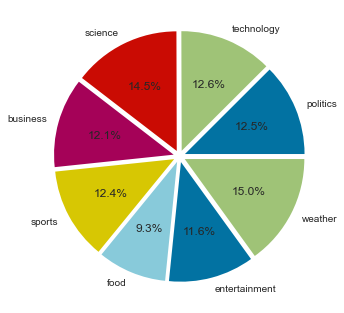

In [30]:
show_pie_chart(df)

As you can see, The amount of articles belonging to food is the lowest.

### 5.2.2 WordCloud

WordCloud graph represent the frequency or the importance of each word.
In this section we will present WordCloud graph for each category.

In [31]:
def wordcloud_draw(dataset, mask=None, color = 'white'):
    if mask is not None:        
        mask = os.path.join(os.getcwd(), mask)
        print(mask)
        mask = np.array(Image.open(f'{mask}',mode='r'))
        
    if isinstance(dataset.iloc[0], str):
        words = ' '.join(dataset)
        cleaned_word = ' '.join([word for word in words.split()])            
        
    wordcloud = WordCloud(background_color = color,
                          mask = mask,
                          width = 2500, 
                          height = 2500,
                          contour_width=2,).generate(cleaned_word)

    plt.figure(1, figsize = (10,7))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [32]:
## Vizualization word cloud
def show_word_cloud(df):
    category_series_words = {}

    for category in set(df["category"]):
        category_words = df[df["category"] == category]["merged_text"]
        category_series_words[category] = category_words

    for category, series_words in category_series_words.items():        
        wordcloud_draw(series_words, f"png/{category}.png", 'white')

/Users/sergeyjuchenko/Desktop/HIT.DataScience.FinalProject-main/png/entertainment.png


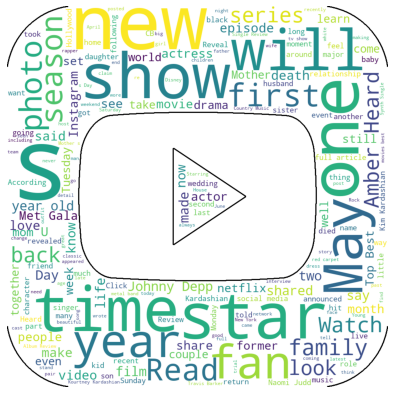

/Users/sergeyjuchenko/Desktop/HIT.DataScience.FinalProject-main/png/sports.png


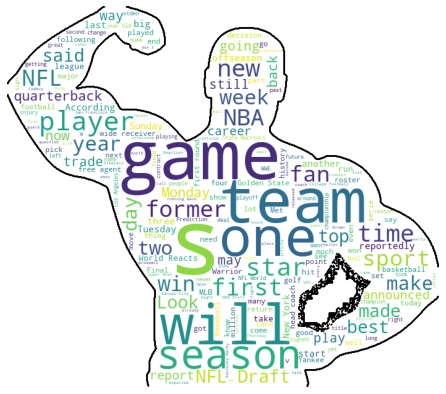

/Users/sergeyjuchenko/Desktop/HIT.DataScience.FinalProject-main/png/politics.png


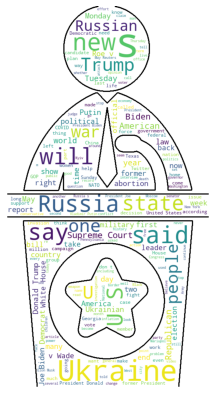

/Users/sergeyjuchenko/Desktop/HIT.DataScience.FinalProject-main/png/technology.png


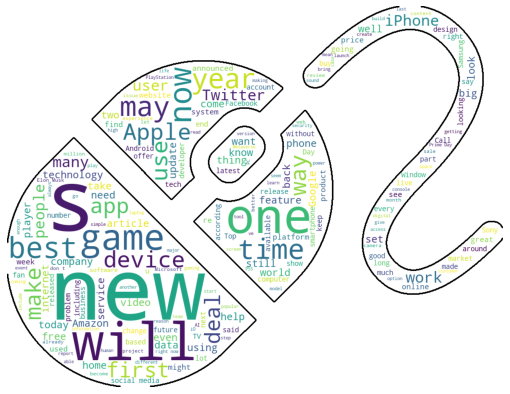

/Users/sergeyjuchenko/Desktop/HIT.DataScience.FinalProject-main/png/weather.png


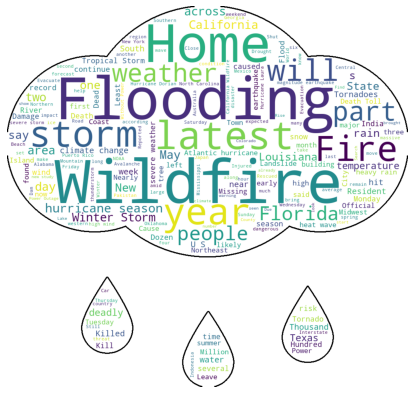

/Users/sergeyjuchenko/Desktop/HIT.DataScience.FinalProject-main/png/food.png


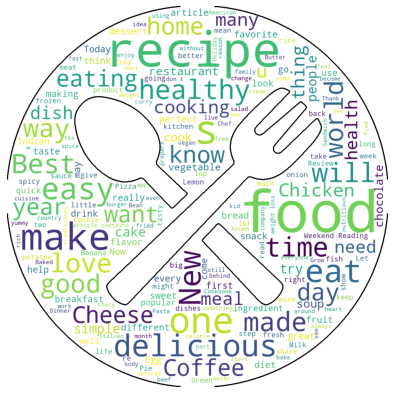

/Users/sergeyjuchenko/Desktop/HIT.DataScience.FinalProject-main/png/business.png


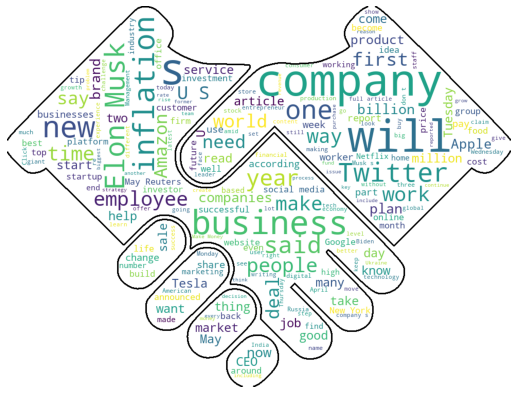

/Users/sergeyjuchenko/Desktop/HIT.DataScience.FinalProject-main/png/science.png


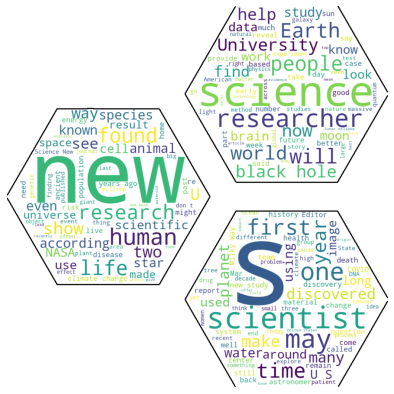

In [33]:
show_word_cloud(df)

### 5.2.3 Top 10 words

In this section we present the top 10 frequency words from each category.

In [34]:
def show_top_10_words(df):
    tmp_df = df.copy()
    if isinstance(tmp_df['merged_text'].iloc[0], str):
        tmp_df['merged_text'] = tmp_df['merged_text'].apply(word_tokenize)
        
    for category in set(tmp_df["category"]):        
        category_words = tmp_df[tmp_df["category"] == category]["merged_text"]

        filtered_words = list(itertools.chain.from_iterable(category_words))        
        counted_words = collections.Counter(filtered_words)

    
        words = []
        counts = []
        for letter, count in counted_words.most_common(10):
            words.append(letter)
            counts.append(count)

        colors = cm.rainbow(np.linspace(0, 1, 10))
        rcParams['figure.figsize'] = 20, 10

        plt.title(f'Top words in the {category} articles')
        plt.xlabel('Count')
        plt.ylabel('Words')
        plt.barh(words, counts, color=colors)
        plt.show()

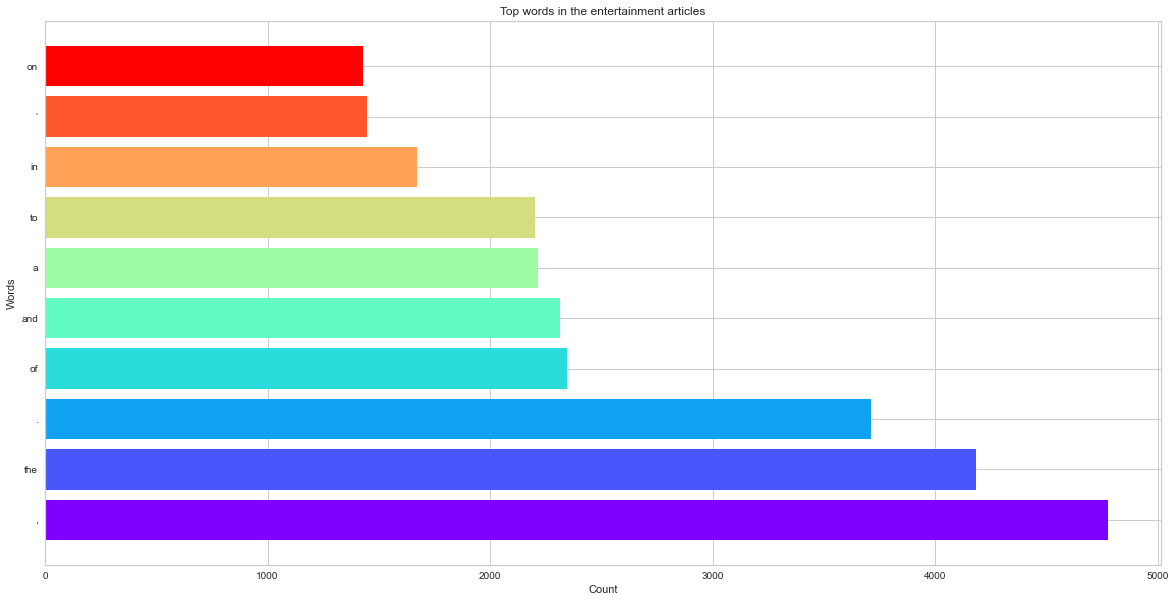

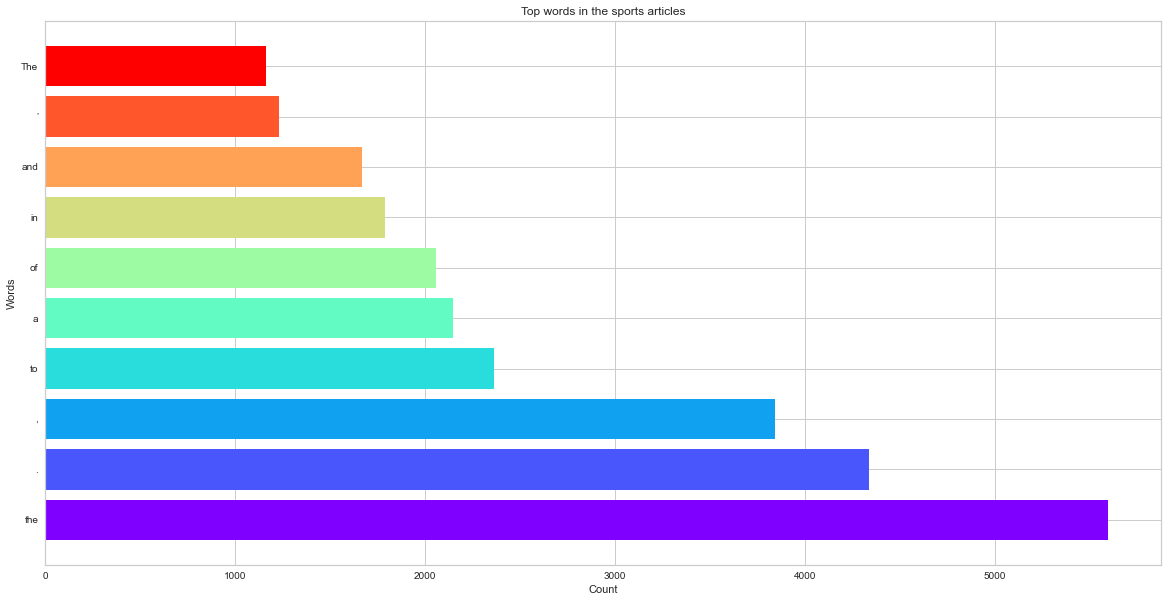

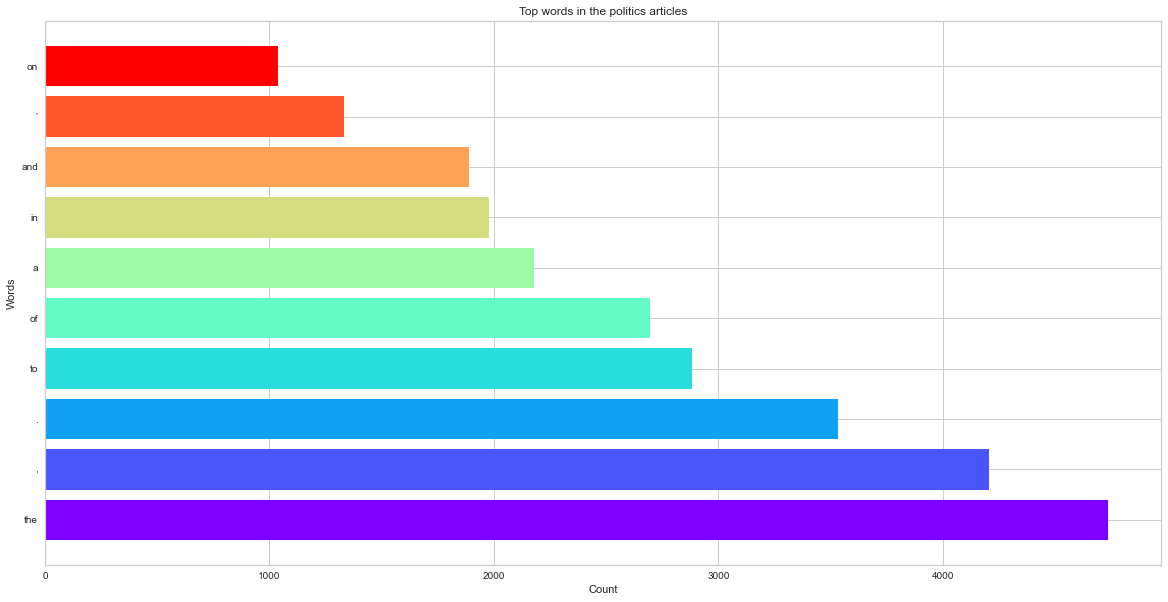

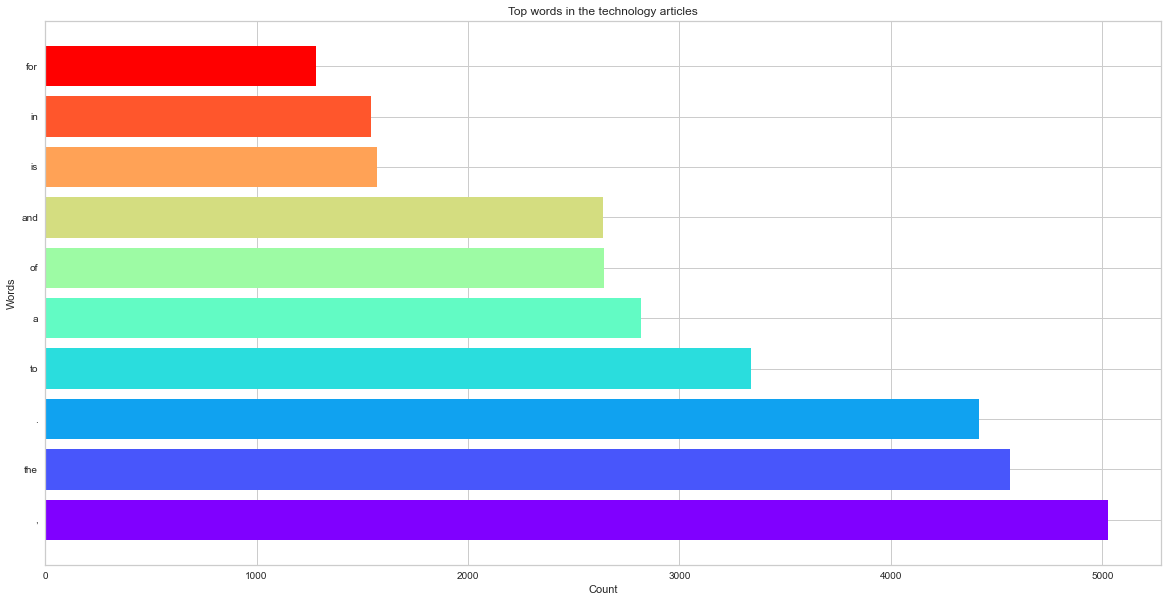

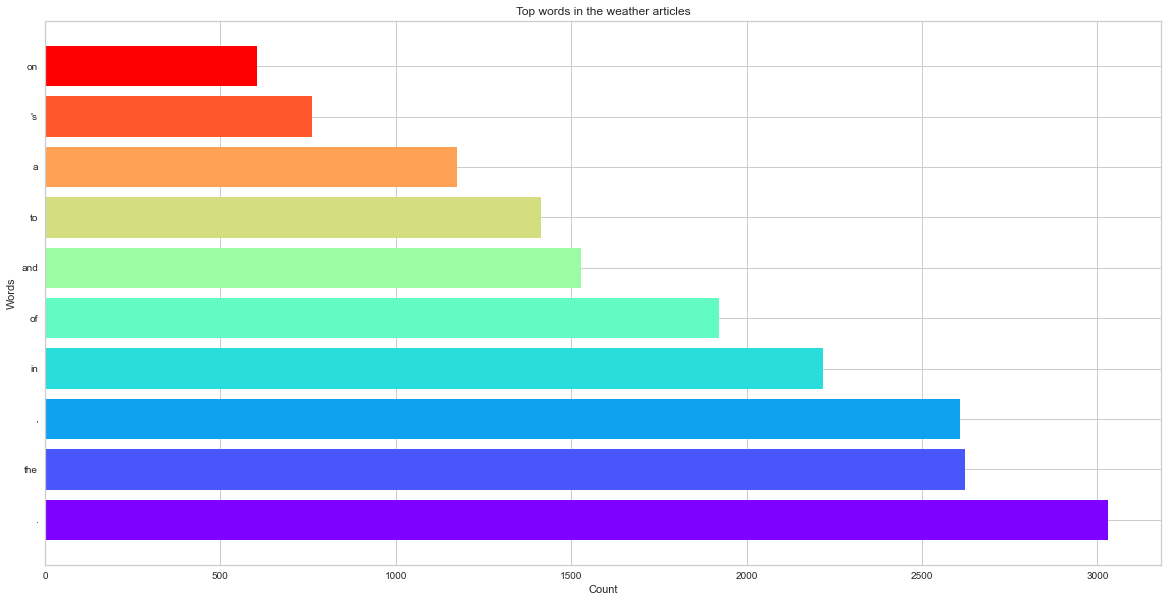

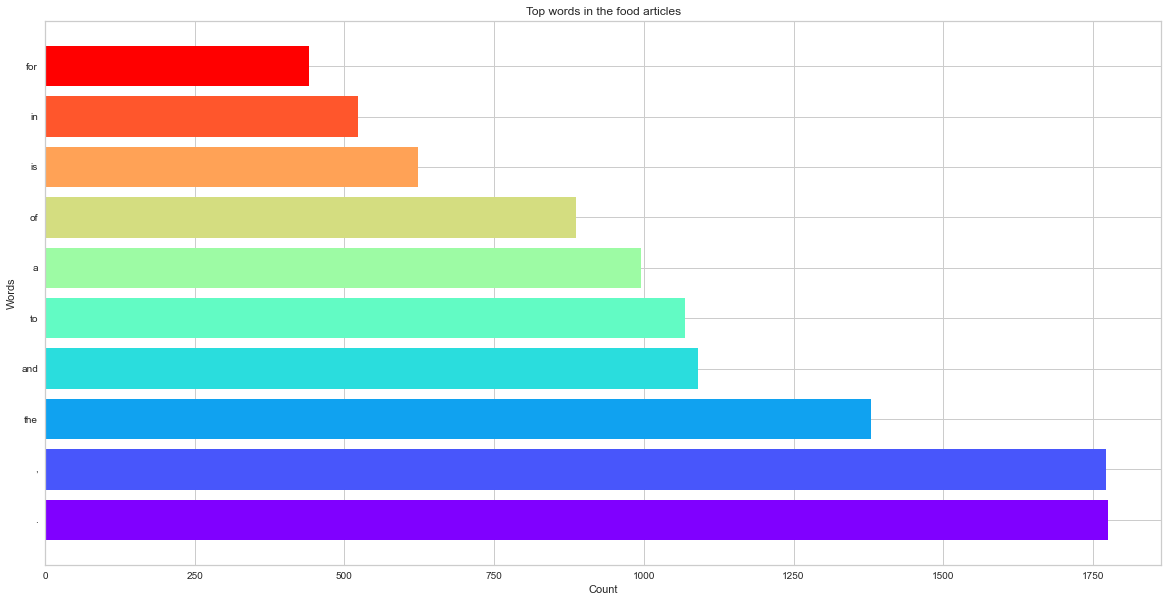

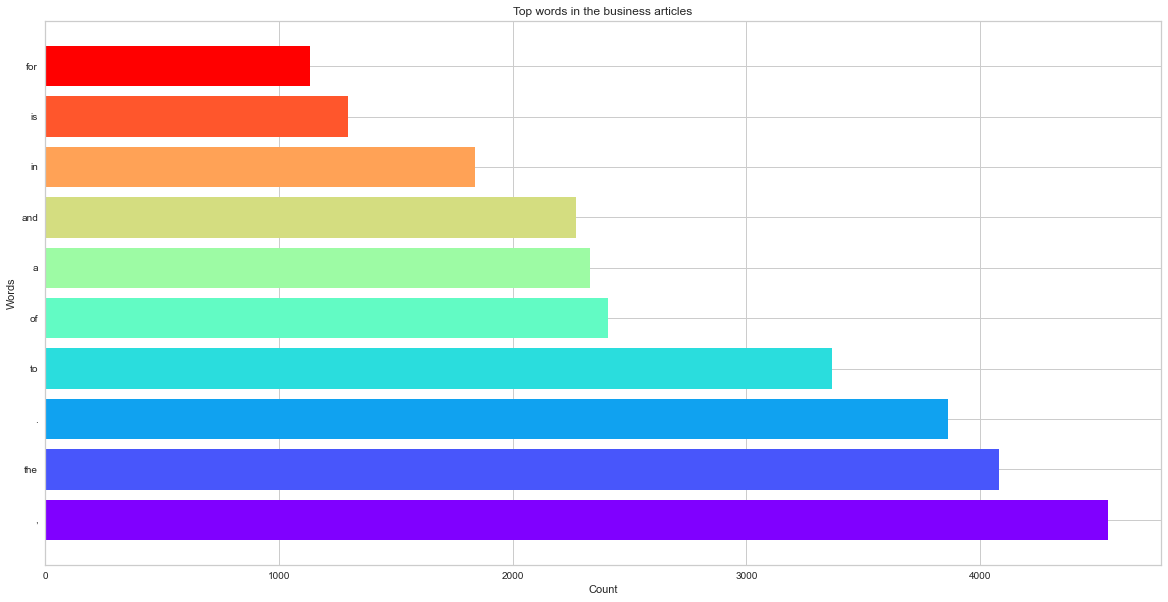

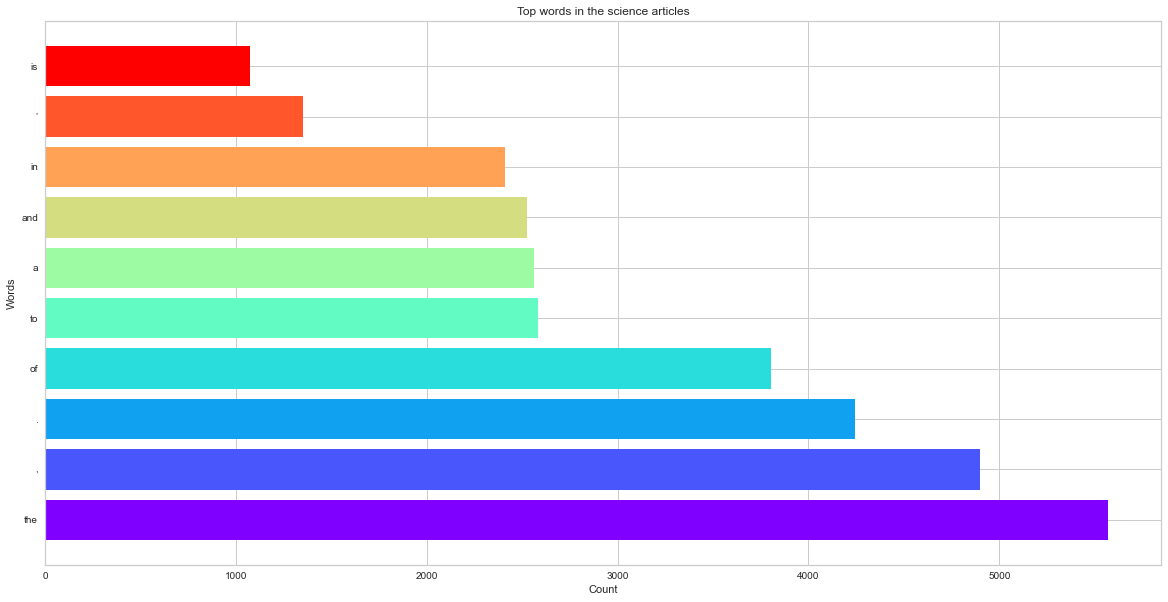

In [35]:
show_top_10_words(df)

As you can see the conclusion from `5.2.3` and `5.2.2` sections there is alot of stopwords which do not help us to categorize the text into categories and symbols (like `,` and `.`). 

### 5.2.4 Distribution of Words

In this section we present a graph that shows the distribution count of words.

In [36]:
def show_distribution_of_words(df):    
    tmp_df = df.copy()
    tmp_df["merged_text"] = tmp_df["merged_text"].apply(word_tokenize)
    tmp_df["words_count"] = tmp_df["merged_text"].apply(len)
    print(tmp_df.head())
    
    sns.set(rc={"figure.figsize": (10, 5)})
    ax = sns.distplot(tmp_df["words_count"], kde=False)
    plt.show()

   category                                        merged_text  words_count
0  politics  [Mary, Trump, slams, Susan, Sarandon, as, a, '...           40
1  politics  [Moment, two, Ukrainian, fighter, jets, bomb, ...          147
2  politics  [Mark, Esper, on, what, 's, at, stake, if, Don...           69
3  politics  [Hunter, Biden, enlists, Hollywood, mega-lawye...           67
4  politics  [President, Trump, 's, response, to, Mark, Esp...           74


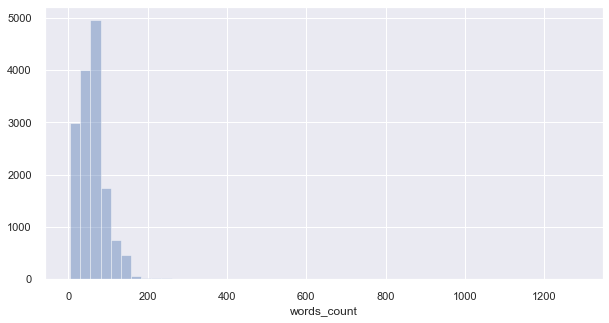

In [37]:
show_distribution_of_words(df)

As you can see the most articles includes between 50 - 80 words.

### 5.2.5 Conclustion

From `Visualization Vol.1` section we understand several things about our data:

**We need more articles from certain categories:**   
From the pie chart we understand that exists a big differene between food, science, weather and the rest in the amount of articles. As a result we decided that we need more articles from these categories and because of that we collect more articles from `Food52`, `ScienceNews` and `Weather.com` sites.

**There are many irrelevant symblos:**  
In `Top 10 Words` section we saw symblos as words, we will remove these symbols in the next sections.  

**There are many irrelevant words:**  
In `Top 10 Words` and `WordCloud` sections we saw many irrelevant words. 
For example: on, the, and, a, of, to etc. 
From that we understand that we need to remove these words from our data. (we will do this in the next sections).  

**Fix spelling issues:**  
To understand this dot we want to start with example from bussinnes `WordCloud` graph:  

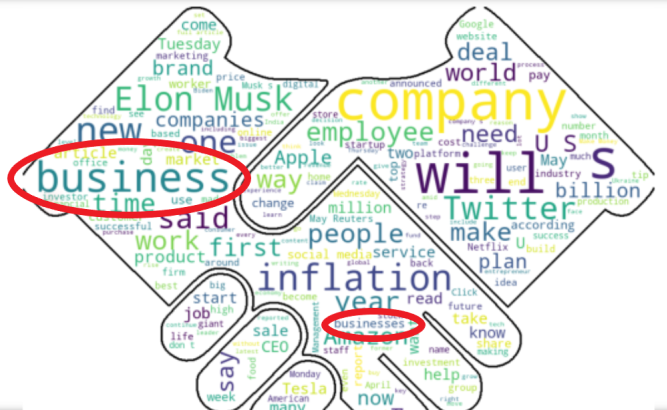

In this example you can see that we have one word with 2 kind of spell.  
But for our case these words are the same word. As a result we need to fix this behaivor.

## 5.3 Remove Text with Short Content

In [38]:
print(f"before: {df.shape}")
df = df[df["merged_text"].str.split().str.len().gt(7)]
print(f"after: {df.shape}")

before: (15021, 2)
after: (14993, 2)


## 5.4 Banford's Law

This section is not necessary for our research but we curious about Benford's Law behaivor.
Benford’s law is named after the American physicist Frank Benford which describes the frequencies of first digits of numbers observed in datasets.

read more: https://en.wikipedia.org/wiki/Benford%27s_law

For example:
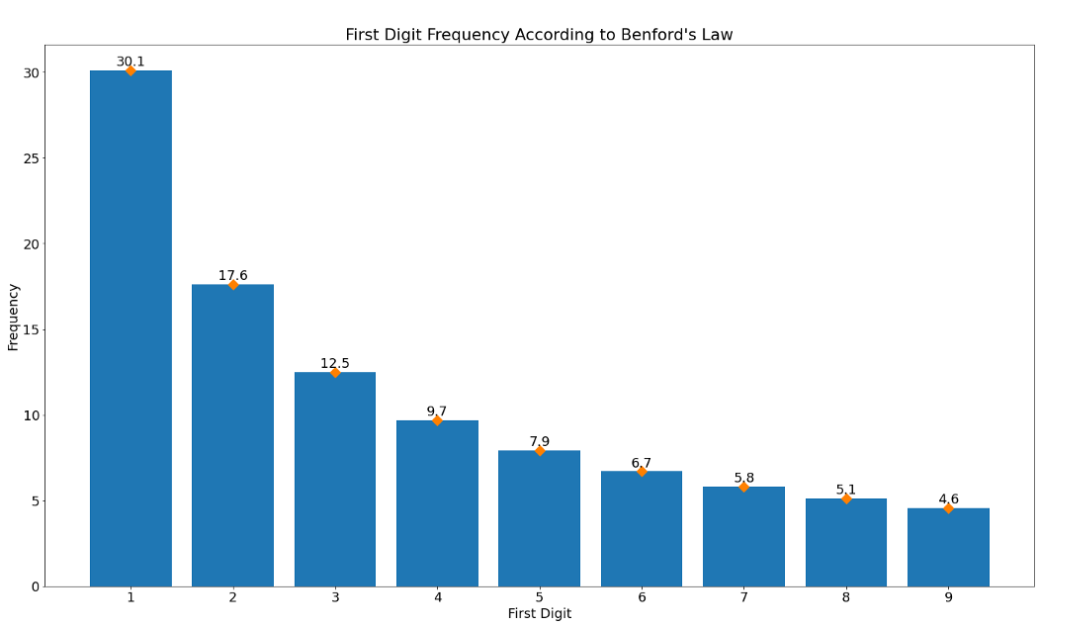

In this section we check that Benford's law exists in our scenario.

{'1': 5191, '2': 7459, '3': 1604, '4': 1378, '5': 1480, '6': 959, '7': 753, '8': 592, '9': 541}


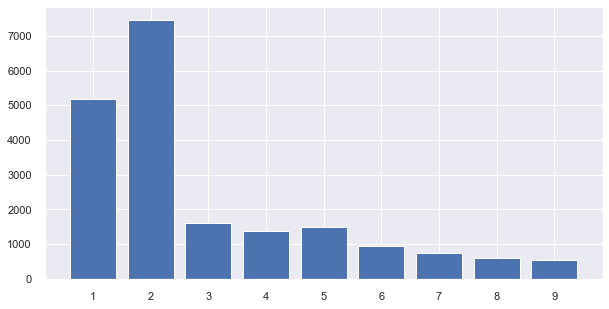

In [40]:
dict_nums = {'1':0 , '2':0, '3':0 , '4':0, '5':0 , '6':0, '7':0 , '8':0, '9':0}


numbers = []
for text in df['merged_text']:
    numbers = re.findall('[1-9]+', text)
    if (len(numbers) > 0):
        for num in numbers: 
            dict_nums[f'{num[0]}'] += 1

names = list(dict_nums.keys())
values = list(dict_nums.values())

print(dict_nums)
plt.bar(range(len(dict_nums)), values, tick_label=names)
plt.show()


**So close :(**

## 5.5 Remove Numbers \n and \r from Text

In this section we remove all the numbers and symbols from the article.

In [41]:
# Remove numbers and \n \r - 
def remove_numbers_and_backslashes(column_name):
    for i, row in df.iterrows():    
        row[f"{column_name}"] = re.sub(r'\d','', row[f"{column_name}"])
        row[f"{column_name}"] = row[f"{column_name}"].replace("\n"," ")
        row[f"{column_name}"] = row[f"{column_name}"].replace("\r"," ")
        row[f"{column_name}"] = row[f"{column_name}"].replace("\t"," ")
        row[f"{column_name}"] = row[f"{column_name}"].replace("-"," ")


In [42]:
remove_numbers_and_backslashes("merged_text")

## 5.6 Remove non-english Texts


As part of the data acquisition there are articles written in non English language and these articles are dumping our dataframe and we would like to get rid of them.

For example:  

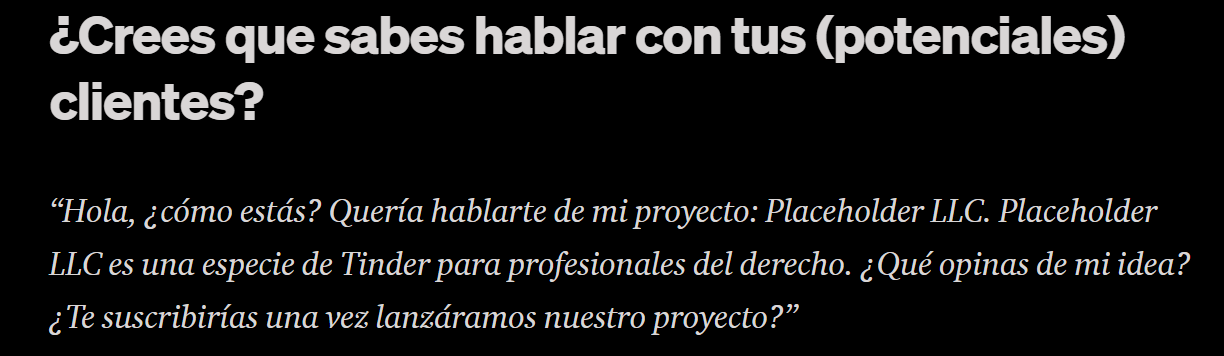

In [43]:
def remove_non_english_articles(df):
    for i, row in df.iterrows():
        try:
            # if en in detect_langs continue
            content_language = detect(row["merged_text"])
            if (row["category"] != "food") and (row["category"] != "entertainment") and (content_language != "en"):
                print("--------------------------------------")
                print(f"!!! Detect merged_text as {content_language} language.\nDrop row form df:\n{row}")
                print(detect_langs(row["merged_text"]))
                print("--------------------------------------")
                print()
                df.drop(i, inplace=True)

        except Exception as error:
            print(f"Drop row form df:\n {row}")
            df.drop(i, inplace=True) 

In [44]:
print(f"before: {df.shape}")
remove_non_english_articles(df)
print(f"after: {df.shape}")

before: (14993, 2)
--------------------------------------
!!! Detect merged_text as no language.
Drop row form df:
category                                              technology
merged_text    Top  Best Eyelid Tape () best eyelid tape for ...
Name: 287, dtype: object
[en:0.4298998163582579, no:0.4272413723816061, tr:0.14285642545983618]
--------------------------------------

--------------------------------------
!!! Detect merged_text as pt language.
Drop row form df:
category                                                 science
merged_text    Quem sou eu? Além da aspirante a poeta que já ...
Name: 713, dtype: object
[pt:0.9999965900412879]
--------------------------------------

--------------------------------------
!!! Detect merged_text as es language.
Drop row form df:
category                                                business
merged_text    ¿Crees que sabes hablar con tus (potenciales) ...
Name: 1316, dtype: object
[es:0.999992307284107]
-----------------------------

## 5.7 Remove Special Characters

In this section we remove the special characters and symbols.

In [45]:
def remove_special_chars(text):
    pattern = r'[^A-Za-z0-9\s]+'
    return re.sub(pattern, '', text)

df['merged_text'] = df['merged_text'].apply(remove_special_chars)

## 5.8 Lemmatization and POS

**Lemmatization** is the grouping together of different forms of the same word.  
**POS** (Part-of-speech) tagging is a popular Natural Language Processing process which refers to categorizing words in a text in correspondence with a particular part of speech, depending on the definition of the word and its context.

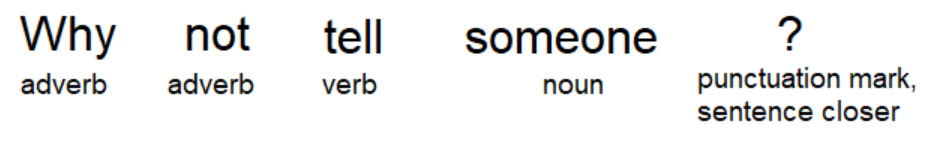

In [46]:
def pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:         
        return None

In [47]:
def lemmatize_word(text):
    lemmatizer = WordNetLemmatizer()
    pos_tagged = nltk.pos_tag(nltk.word_tokenize(text)) 
    wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged))
    lemmatized_text = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatized_text.append(word)
        else:       
            lemmatized_text.append(lemmatizer.lemmatize(word, tag))
    lemmatized_text = " ".join(lemmatized_text)
    
    return lemmatized_text

In [48]:
print(df)
df['merged_text'] = df['merged_text'].apply(lemmatize_word)
print(df)

       category                                        merged_text
0      politics  Mary Trump slams Susan Sarandon as a moron for...
1      politics  Moment two Ukrainian fighter jets bomb Russian...
2      politics  Mark Esper on whats at stake if Donald Trump i...
3      politics  Hunter Biden enlists Hollywood mega lawyer for...
4      politics  President Trumps response to Mark Espers  Minu...
...         ...                                                ...
15016      food  Classic Tater Tot Casserole with Green Beans T...
15017      food  Stews of South India Know about different stew...
15018      food  Biscuits from Self Rising Flour Biscuits are a...
15019      food  Streusel Topping for Banana Bread for Example ...
15020      food   Fresh Summer Drinks That Refresh You If you a...

[14971 rows x 2 columns]
       category                                        merged_text
0      politics  Mary Trump slam Susan Sarandon as a moron for ...
1      politics  Moment two Ukrainia

In [49]:
clean_df2 = df.copy()
clean_df2.reset_index(inplace=True)
clean_df2.to_csv("clean_df2.csv")

df = clean_df2.copy()


In [50]:
df.drop(columns="index", axis=1, inplace=True)
df.head()

category                                        merged_text
0  politics  Mary Trump slam Susan Sarandon as a moron for ...
1  politics  Moment two Ukrainian fighter jet bomb Russian ...
2  politics  Mark Esper on whats at stake if Donald Trump b...
3  politics  Hunter Biden enlist Hollywood mega lawyer for ...
4  politics  President Trumps response to Mark Espers Minut...

## 5.9 Dataframe Lowercase

In this section we lowcase all the data.

In [51]:
def convert_lower(text):
    text = text.lower()
    return text

df['merged_text'] = df['merged_text'].apply(convert_lower)
df

category                                        merged_text
0      politics  mary trump slam susan sarandon as a moron for ...
1      politics  moment two ukrainian fighter jet bomb russian ...
2      politics  mark esper on whats at stake if donald trump b...
3      politics  hunter biden enlist hollywood mega lawyer for ...
4      politics  president trumps response to mark espers minut...
...         ...                                                ...
14966      food  classic tater tot casserole with green beans t...
14967      food  stews of south india know about different stew...
14968      food  biscuits from self rising flour biscuits be a ...
14969      food  streusel topping for banana bread for example ...
14970      food  fresh summer drinks that refresh you if you be...

[14971 rows x 2 columns]

## 5.10 Remove Stopwords

Stop words are a set of commonly used words in any language. For example, in English, “the”, “is” and “and”, would easily qualify as stop words.  

In this sction we remove these stopwords

In [52]:
stop_words = stopwords.words('english') + ["a","this", "one", "new", "say", "may", "get", "make", "use", "i", "the","first"]
df['merged_text'] = df['merged_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))


## 5.11 Visualization Vol.2

Until this section we show the problems in our data according to visualization Vol.1. 
As a result we modify our data to be more accurate for our predict.

In this section we present again the visualiztion vol.1 and we analize our data.

### 5.11.1 Pie Chart

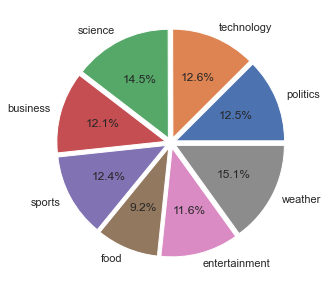

In [53]:
show_pie_chart(df)

### 5.11.2 WordCloud

/Users/sergeyjuchenko/Desktop/HIT.DataScience.FinalProject-main/png/entertainment.png


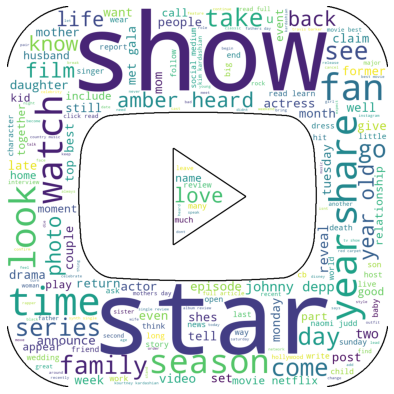

/Users/sergeyjuchenko/Desktop/HIT.DataScience.FinalProject-main/png/sports.png


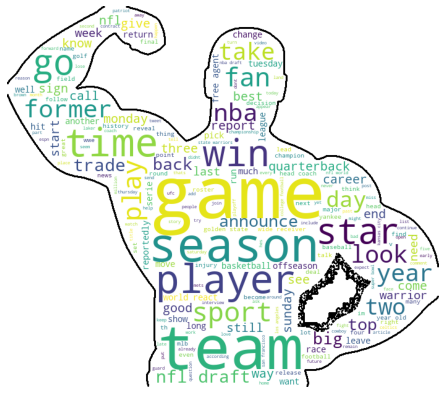

/Users/sergeyjuchenko/Desktop/HIT.DataScience.FinalProject-main/png/politics.png


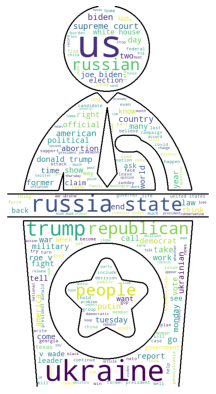

/Users/sergeyjuchenko/Desktop/HIT.DataScience.FinalProject-main/png/technology.png


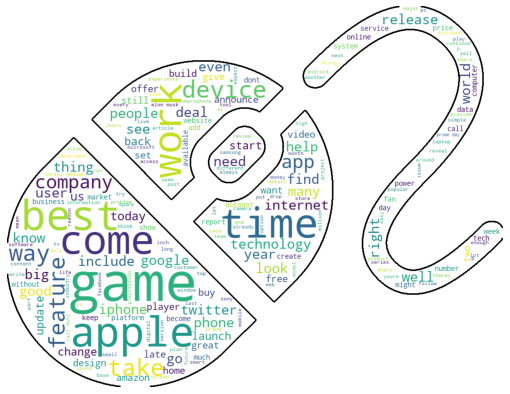

/Users/sergeyjuchenko/Desktop/HIT.DataScience.FinalProject-main/png/weather.png


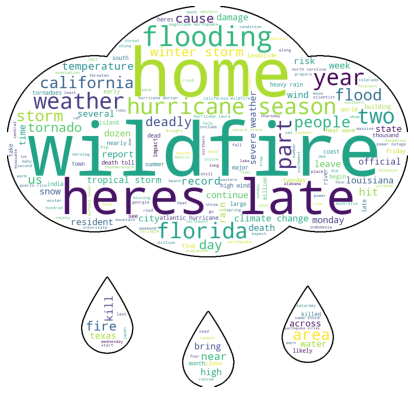

/Users/sergeyjuchenko/Desktop/HIT.DataScience.FinalProject-main/png/food.png


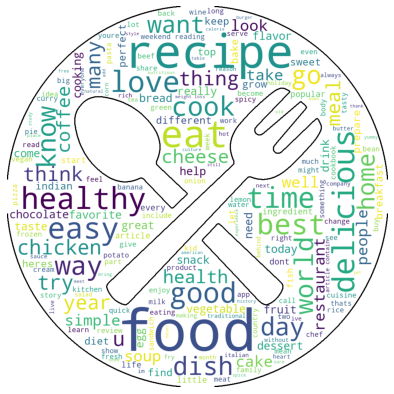

/Users/sergeyjuchenko/Desktop/HIT.DataScience.FinalProject-main/png/business.png


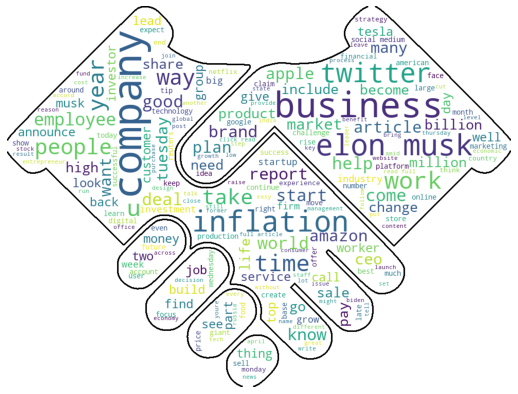

/Users/sergeyjuchenko/Desktop/HIT.DataScience.FinalProject-main/png/science.png


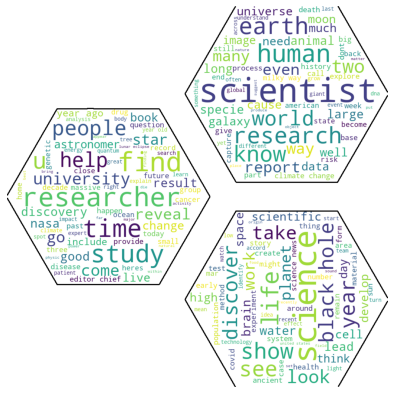

In [54]:
show_word_cloud(df)

### 5.11.3 Top 10 Words

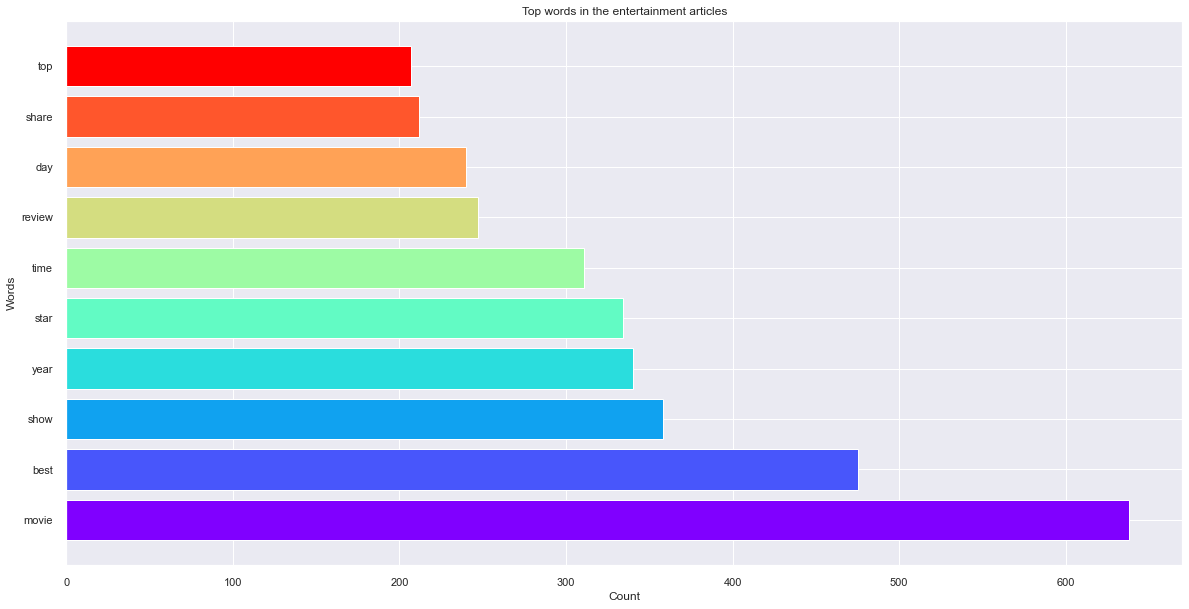

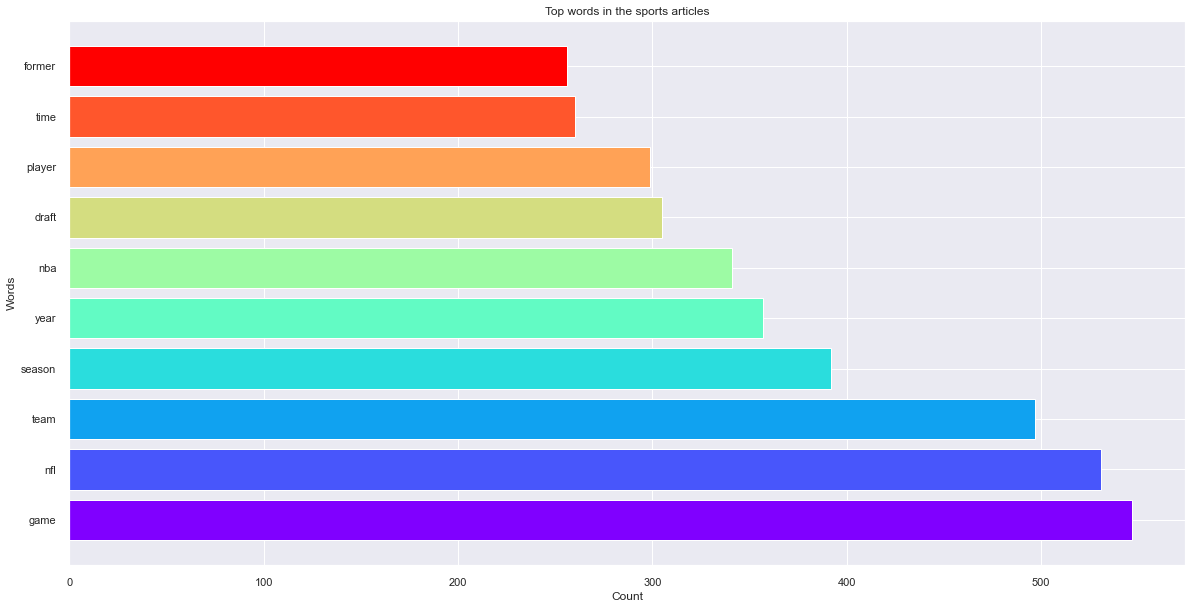

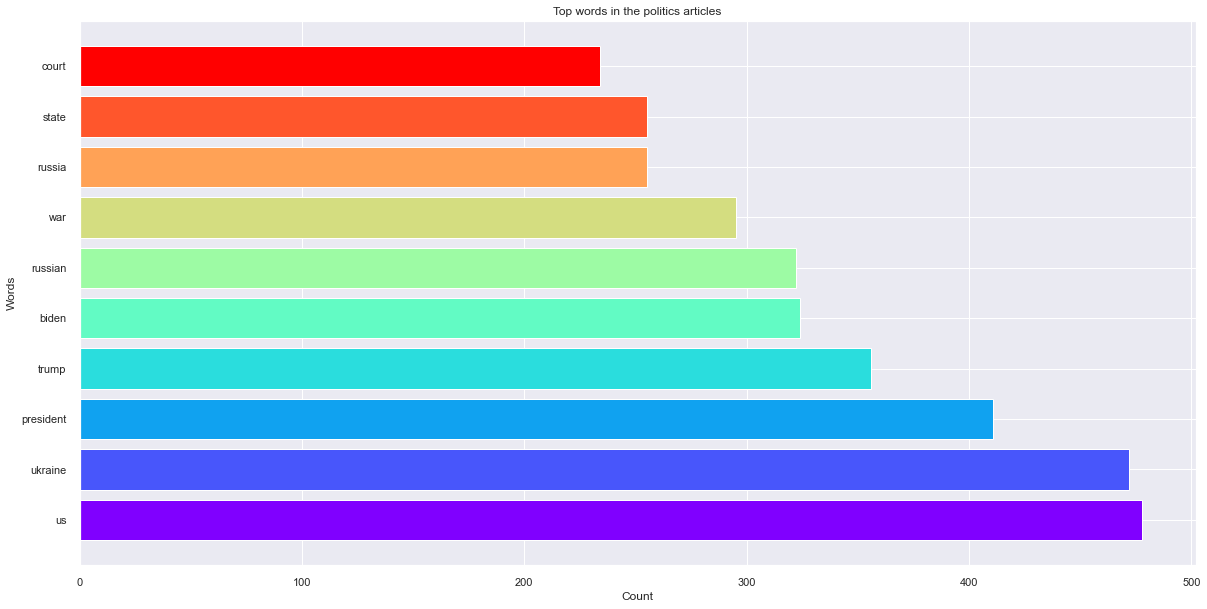

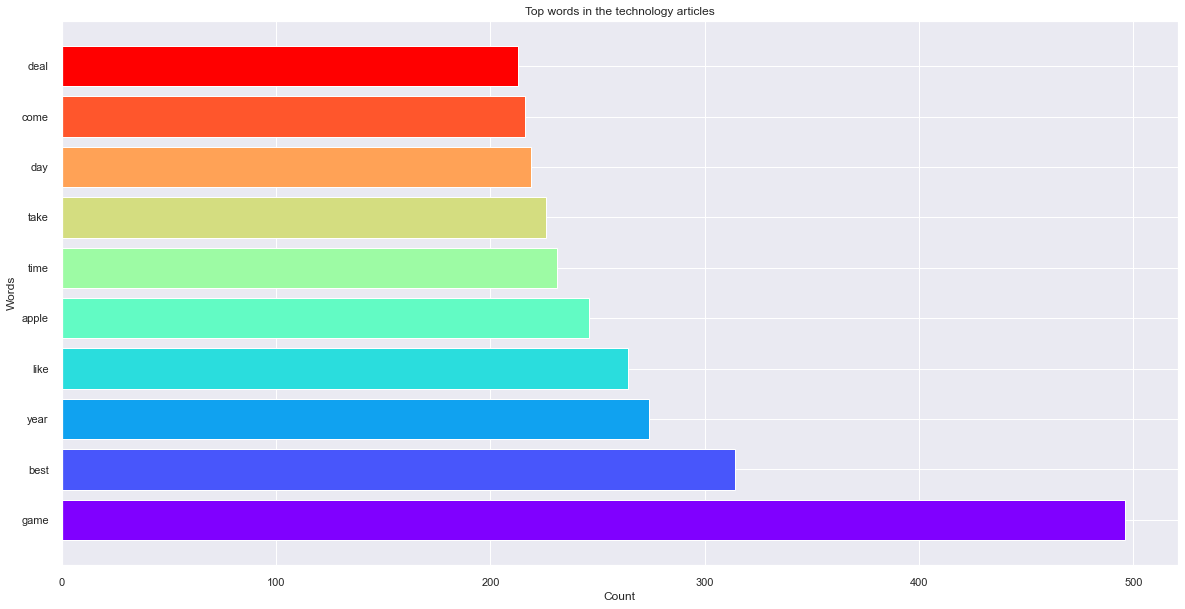

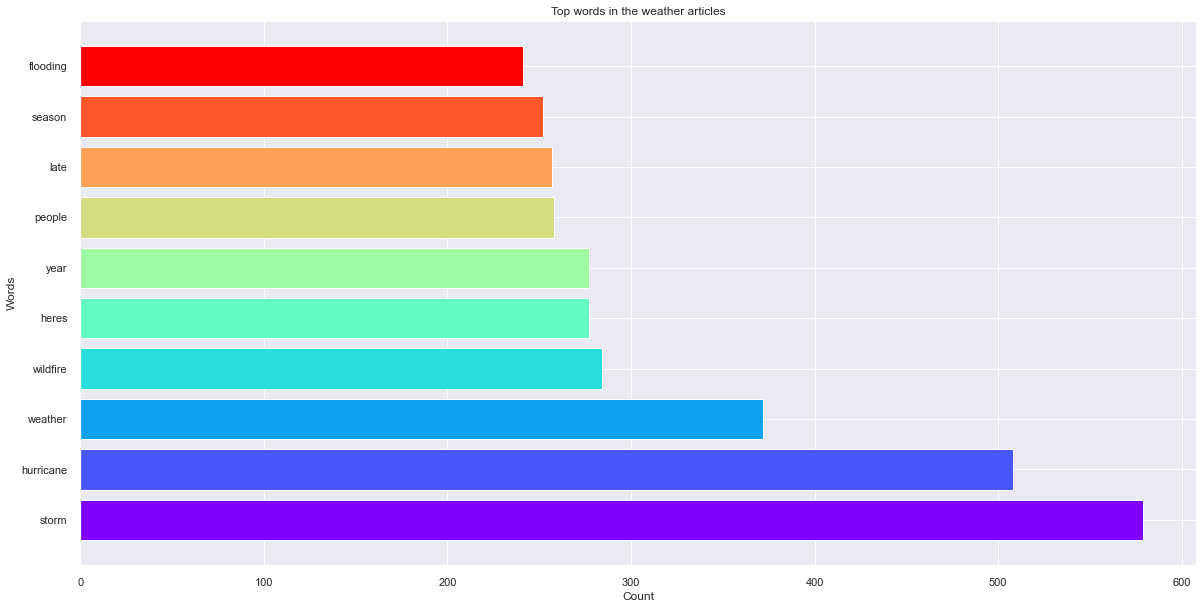

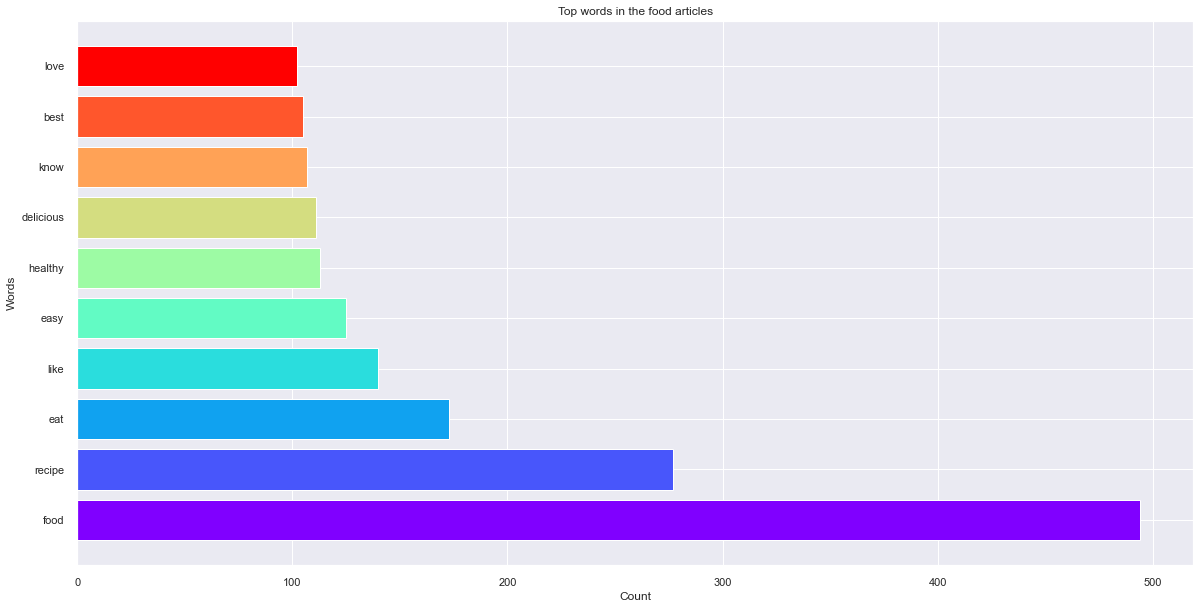

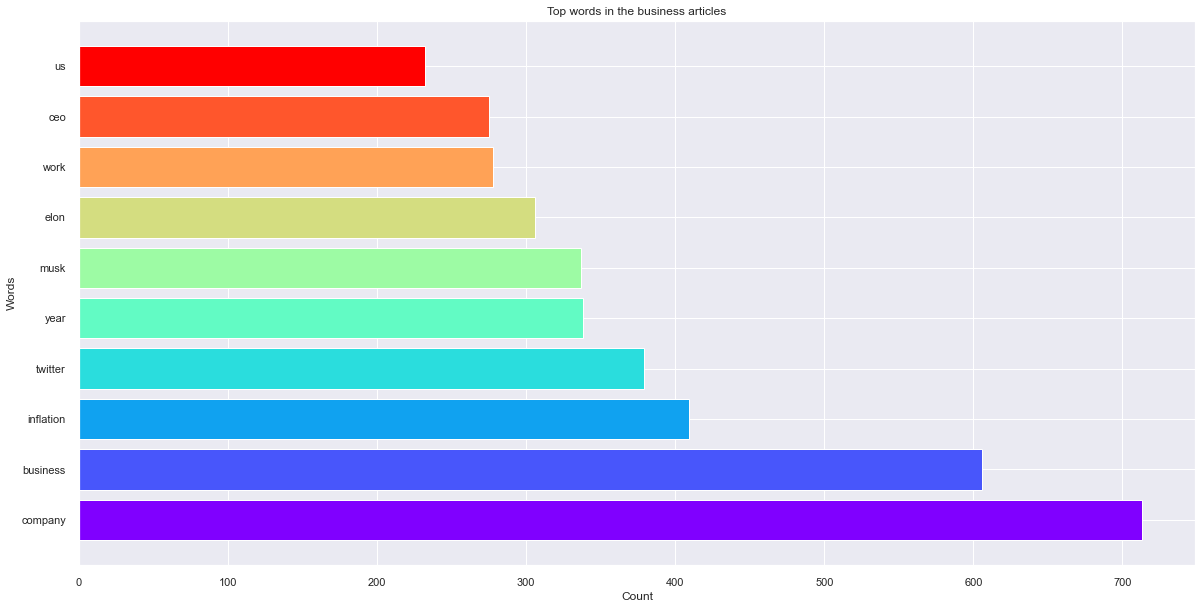

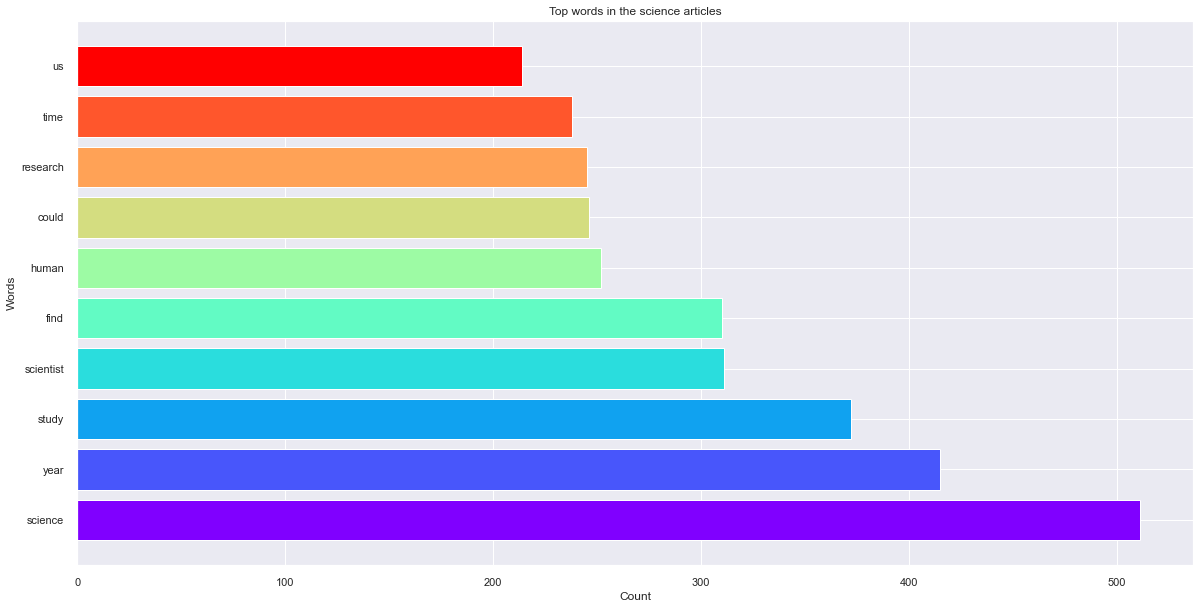

In [55]:
show_top_10_words(df)

### 5.11.4 Distribution of Words

   category                                        merged_text  words_count
0  politics  [mary, trump, slam, susan, sarandon, moron, su...           24
1  politics  [moment, two, ukrainian, fighter, jet, bomb, r...           97
2  politics  [mark, esper, whats, stake, donald, trump, ele...           38
3  politics  [hunter, biden, enlist, hollywood, mega, lawye...           42
4  politics  [president, trumps, response, mark, espers, mi...           34


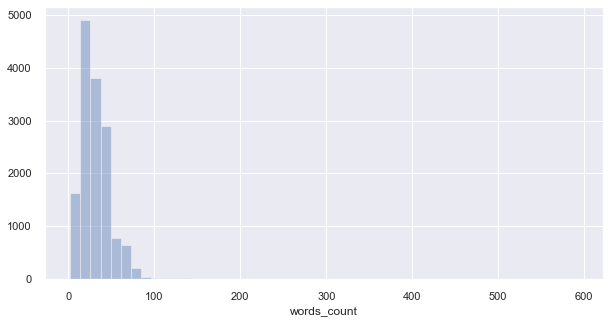

In [56]:
show_distribution_of_words(df)

As you can see, after we clean our data the words Distribution down to 30 - 50 words.

In [57]:
df.to_csv("ml_data.csv")
ml_df = df.copy()

## 5.12 Final EDA Conclustion

In the EDA section we understand deeply all the problems in our data, most of them discovered from the visualization Vol.1 section. 
From these problems we have come to many insights.  
According to these insights we clean and improve our data before we continue to machine learning part. 

# 6.0 Vectorization and Machine Learning

The machine learning algorithms dont know to work with text, as a result we need to convert our data to numbers (vectors) and after that inject the data to the algorithm.  

In [73]:
ml_df.head()

category                                        merged_text
0  politics  mary trump slam susan sarandon moron suggest p...
1  politics  moment two ukrainian fighter jet bomb russian ...
2  politics  mark esper whats stake donald trump elect pres...
3  politics  hunter biden enlist hollywood mega lawyer coun...
4  politics  president trumps response mark espers minutes ...

## 6.1 Vectorization

To convert the strings to numbers, we choose the `CountVectorizer` method.  
`CountVectorizer` convert a collection of text documents to a matrix of token counts.

We use `ngram_range` flag (the lower and upper boundary of the range of n-values for different word to be extracted)  
to catch words like `New-York` and `Elon Mask`.

We choose `min_df` flag to ignore words that appear only 1 time.

In [74]:
x = np.array(ml_df["merged_text"])
y = np.array(ml_df["category"])

cnt_vectorizer = CountVectorizer(min_df=2, ngram_range=(1, 2))
x = cnt_vectorizer.fit_transform(x)

In [75]:
print(f"feutures:{len(cnt_vectorizer.get_feature_names())}")
print(f"x shape: {x.shape}") #text vector
print(f"y shape: {y.shape}") #category  

feutures:63919
x shape: (14971, 63919)
y shape: (14971,)


## 6.2 Multinomial NB

Multinomial Naive Bayes algorithm is a probabilistic learning method that is mostly used in Natural Language Processing (NLP). The algorithm is based on the Bayes theorem and predicts the tag of a text such as a piece of email or newspaper article.
It calculates the probability of each tag for a given sample and then gives the tag with the highest probability as output.

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

model = MultinomialNB()
model.fit(x_train,y_train) 

MultinomialNB()

### 6.2.1 Confusion Matrix

Confusion matrix is a very popular measure used while solving classification problems. It can be applied to binary classification as well as for multiclass classification problems.

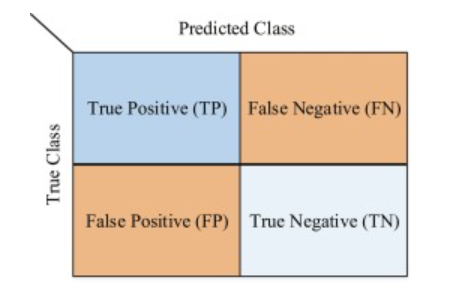

The confusion matrix represents the correctly classified TP values, FP values in the relevant class while it should be in another class, and FN values in another class while it should be in the relevant class and the correctly classified TN values in the other class.

accuracy: 0.8199020480854853


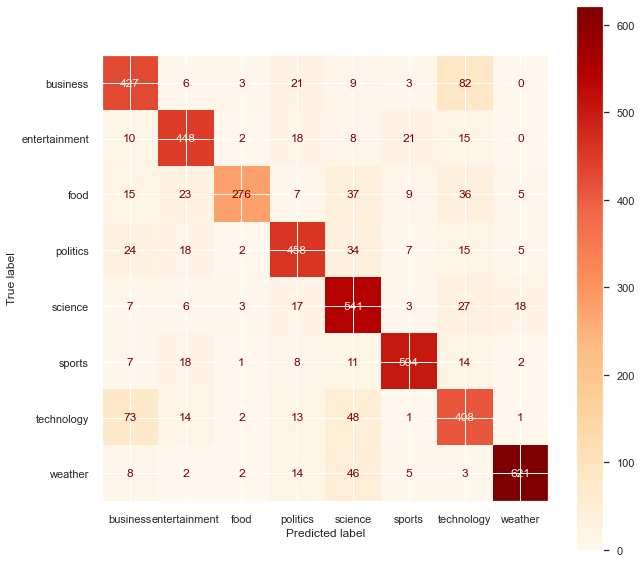

In [77]:
predicted = model.predict(x_test)
print(f"accuracy: {np.mean(predicted == y_test)}")

fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(model, x_test, y_test,cmap="OrRd",ax=ax)

In [78]:
print(metrics.classification_report(y_test, predicted,target_names=set(y_test)))

               precision    recall  f1-score   support

entertainment       0.75      0.77      0.76       551
       sports       0.84      0.86      0.85       522
     politics       0.95      0.68      0.79       408
      weather       0.82      0.81      0.82       563
   technology       0.74      0.87      0.80       622
         food       0.91      0.89      0.90       565
     business       0.68      0.73      0.70       560
      science       0.95      0.89      0.92       701

     accuracy                           0.82      4492
    macro avg       0.83      0.81      0.82      4492
 weighted avg       0.83      0.82      0.82      4492



### Class Prediction Error

this plot shows the support (number of training samples) for each class in the fitted classification model as a stacked bar chart. Each bar is segmented to show the proportion of predictions (including false negatives and false positives, like a Confusion Matrix) for each class. You can use a ClassPredictionError to visualize which classes your classifier is having a particularly difficult time with, and more importantly, what incorrect answers it is giving on a per-class basis. This can often enable you to better understand strengths and weaknesses of different models and particular challenges unique to your dataset.

The class prediction error chart provides a way to quickly understand how good your classifier is at predicting the right classes.

https://www.scikit-yb.org/en/latest/api/classifier/class_prediction_error.html


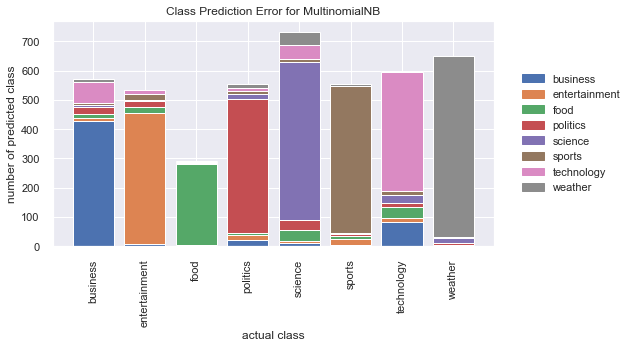

<AxesSubplot:title={'center':'Class Prediction Error for MultinomialNB'}, xlabel='actual class', ylabel='number of predicted class'>

In [79]:
visualizer = ClassPredictionError(model)#Multinomial NaiveBase model
visualizer.fit(x_train,y_train)
visualizer.score(x_test, y_test)

visualizer.poof()

## 6.2.2 Cross Validation

Cross-Validation is a statistical method of evaluating and comparing learning algorithms by dividing data into two segments:   
* The first one used to learn or train a model and 
* The second one used to validate the model. 

Stratified K-Fold is an enhanced version of K-Fold cross-validation which is mainly used for imbalanced datasets. Just like K-fold, the whole dataset is divided into K-folds of equal size.

But in this technique, each fold will have the same ratio of instances of target variable as in the whole datasets.

In [80]:
stratifiedkf=StratifiedKFold(n_splits=10)
score=cross_val_score(model,x,y,cv=stratifiedkf)
print(f"Cross Validation Scores are {score}")
print(f"Average Cross Validation score :{score.mean()}")

Cross Validation Scores are [0.82176235 0.83166333 0.81295925 0.81229125 0.75751503 0.75551102
 0.81563126 0.82698731 0.83233133 0.83032732]
Average Cross Validation score :0.8096979450668137


### lets try to predict a random text

In [81]:
text_to_predict = "avi is the best researcher in israel"
text_to_predict = cnt_vectorizer.transform([text_to_predict]).toarray()

In [82]:
print(model.predict(text_to_predict))

['science']


## 6.3 SVM Classifier

A Support Vector Machine (SVM) is a supervised machine learning algorithm that can be employed for classification.
SVMs are based on the idea of finding a hyperplane that best divides a dataset into two classes, as shown in the image below.

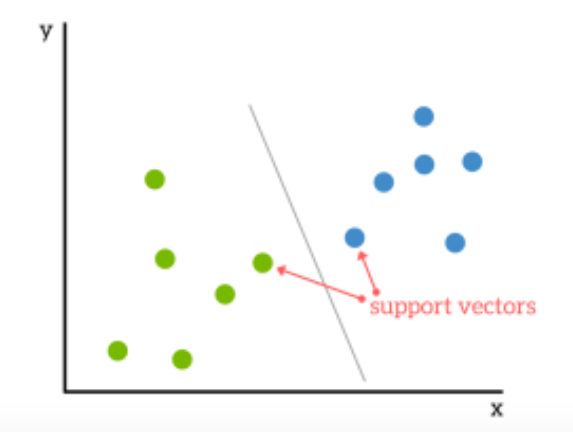


Let's try another model.

In [83]:
model = svm.SVC(kernel='linear')
model.fit(x_train, y_train)

predicted = model.predict(x_test)

print(f"accuracy: {np.mean(predicted == y_test)}")

accuracy: 0.7914069456812111


## 6.3.1 Confusion Matrix

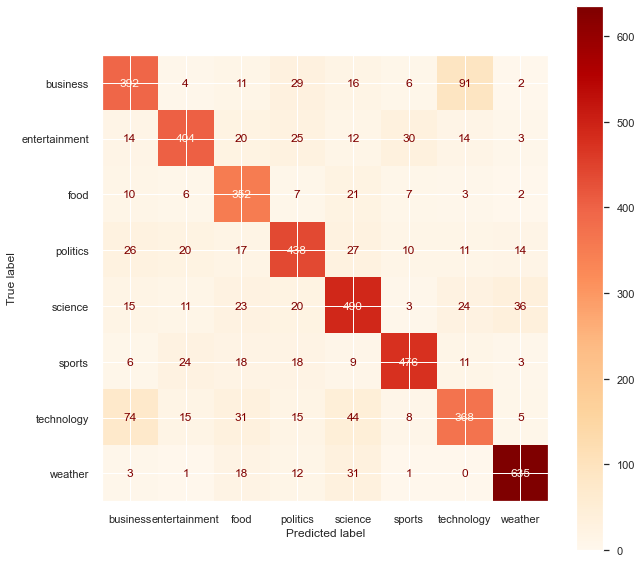

In [84]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(model, x_test, y_test,cmap="OrRd",ax=ax)

In [85]:
print(metrics.classification_report(y_test, predicted,target_names=set(y_test)))

               precision    recall  f1-score   support

entertainment       0.73      0.71      0.72       551
       sports       0.83      0.77      0.80       522
     politics       0.72      0.86      0.78       408
      weather       0.78      0.78      0.78       563
   technology       0.75      0.79      0.77       622
         food       0.88      0.84      0.86       565
     business       0.70      0.66      0.68       560
      science       0.91      0.91      0.91       701

     accuracy                           0.79      4492
    macro avg       0.79      0.79      0.79      4492
 weighted avg       0.79      0.79      0.79      4492



### Class Prediction Error

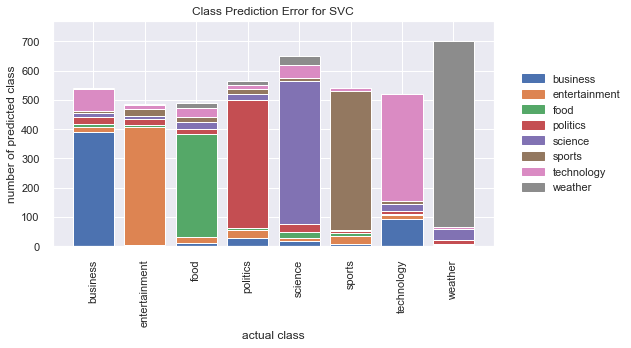

<AxesSubplot:title={'center':'Class Prediction Error for SVC'}, xlabel='actual class', ylabel='number of predicted class'>

In [86]:
visualizer = ClassPredictionError(model)#SVM model
visualizer.fit(x_train,y_train)
visualizer.score(x_test, y_test)

visualizer.poof()

## 6.3.2 Cross Validation

In [87]:
stratifiedkf=StratifiedKFold(n_splits=10)
score=cross_val_score(model,x,y,cv=stratifiedkf)
print(f"Cross Validation Scores are {score}")
print(f"Average Cross Validation score :{score.mean()}")

Cross Validation Scores are [0.75967957 0.78156313 0.78223113 0.77354709 0.73947896 0.74549098
 0.79492318 0.80895124 0.80828323 0.79158317]
Average Cross Validation score :0.7785731676972101


# 7.0 Project Conclustion

The project was very challenging to work on a project that deals with texts, Each site had its own difficulty in acquiring the data.  
In addition, it required us to understand how to arrange the test in a way that would be most helpful for machine learning algorithms.  
Finally, We reached impressive results and we learn alot about classification text problem.  
Next we will want to investigate whether there is a difference in results when using all the text or header and content is enough.